In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd


In [2]:
def p(x, coef):
    y = 0
    for i,k in enumerate(coef):
        y += k * (x**(len(coef)-1 - i))
    return y

# Experimento 1: Determinando a constante de Planck

## Dados coletados

In [3]:
#Comprimento de onda do filtro
wl = np.array([365, 405, 436, 546, 577]) * 1e-9 #m

#Potencial de parada(2mm)
v_s2 = np.array([-1.513, -1.097, -0.895, -0.442, -0.306]) #V

#Potencial de parada(4mm)
v_s = np.array([-1.560, -1.157, -0.939, -0.460, -0.332]) #V

#Potencial de parada(8mm)
v_s8 = np.array([-1.594, -1.200, -0.974, -0.477, -0.365])

#Estamos considerando essa incerteza devido as flutuações que ocorriam na hora da medida
sigma_v_s = np.full(len(v_s), 0.001) #V

## Calculando a frequência a partir do comprimento de onda

$$\nu = \frac{c}{\lambda}$$

In [4]:
c = 299792458 #m/s
f = c/wl

print('Frequência: ', f)

Frequência:  [8.21349200e+14 7.40228291e+14 6.87597381e+14 5.49070436e+14
 5.19570984e+14]


## Gráfico dos dados brutos

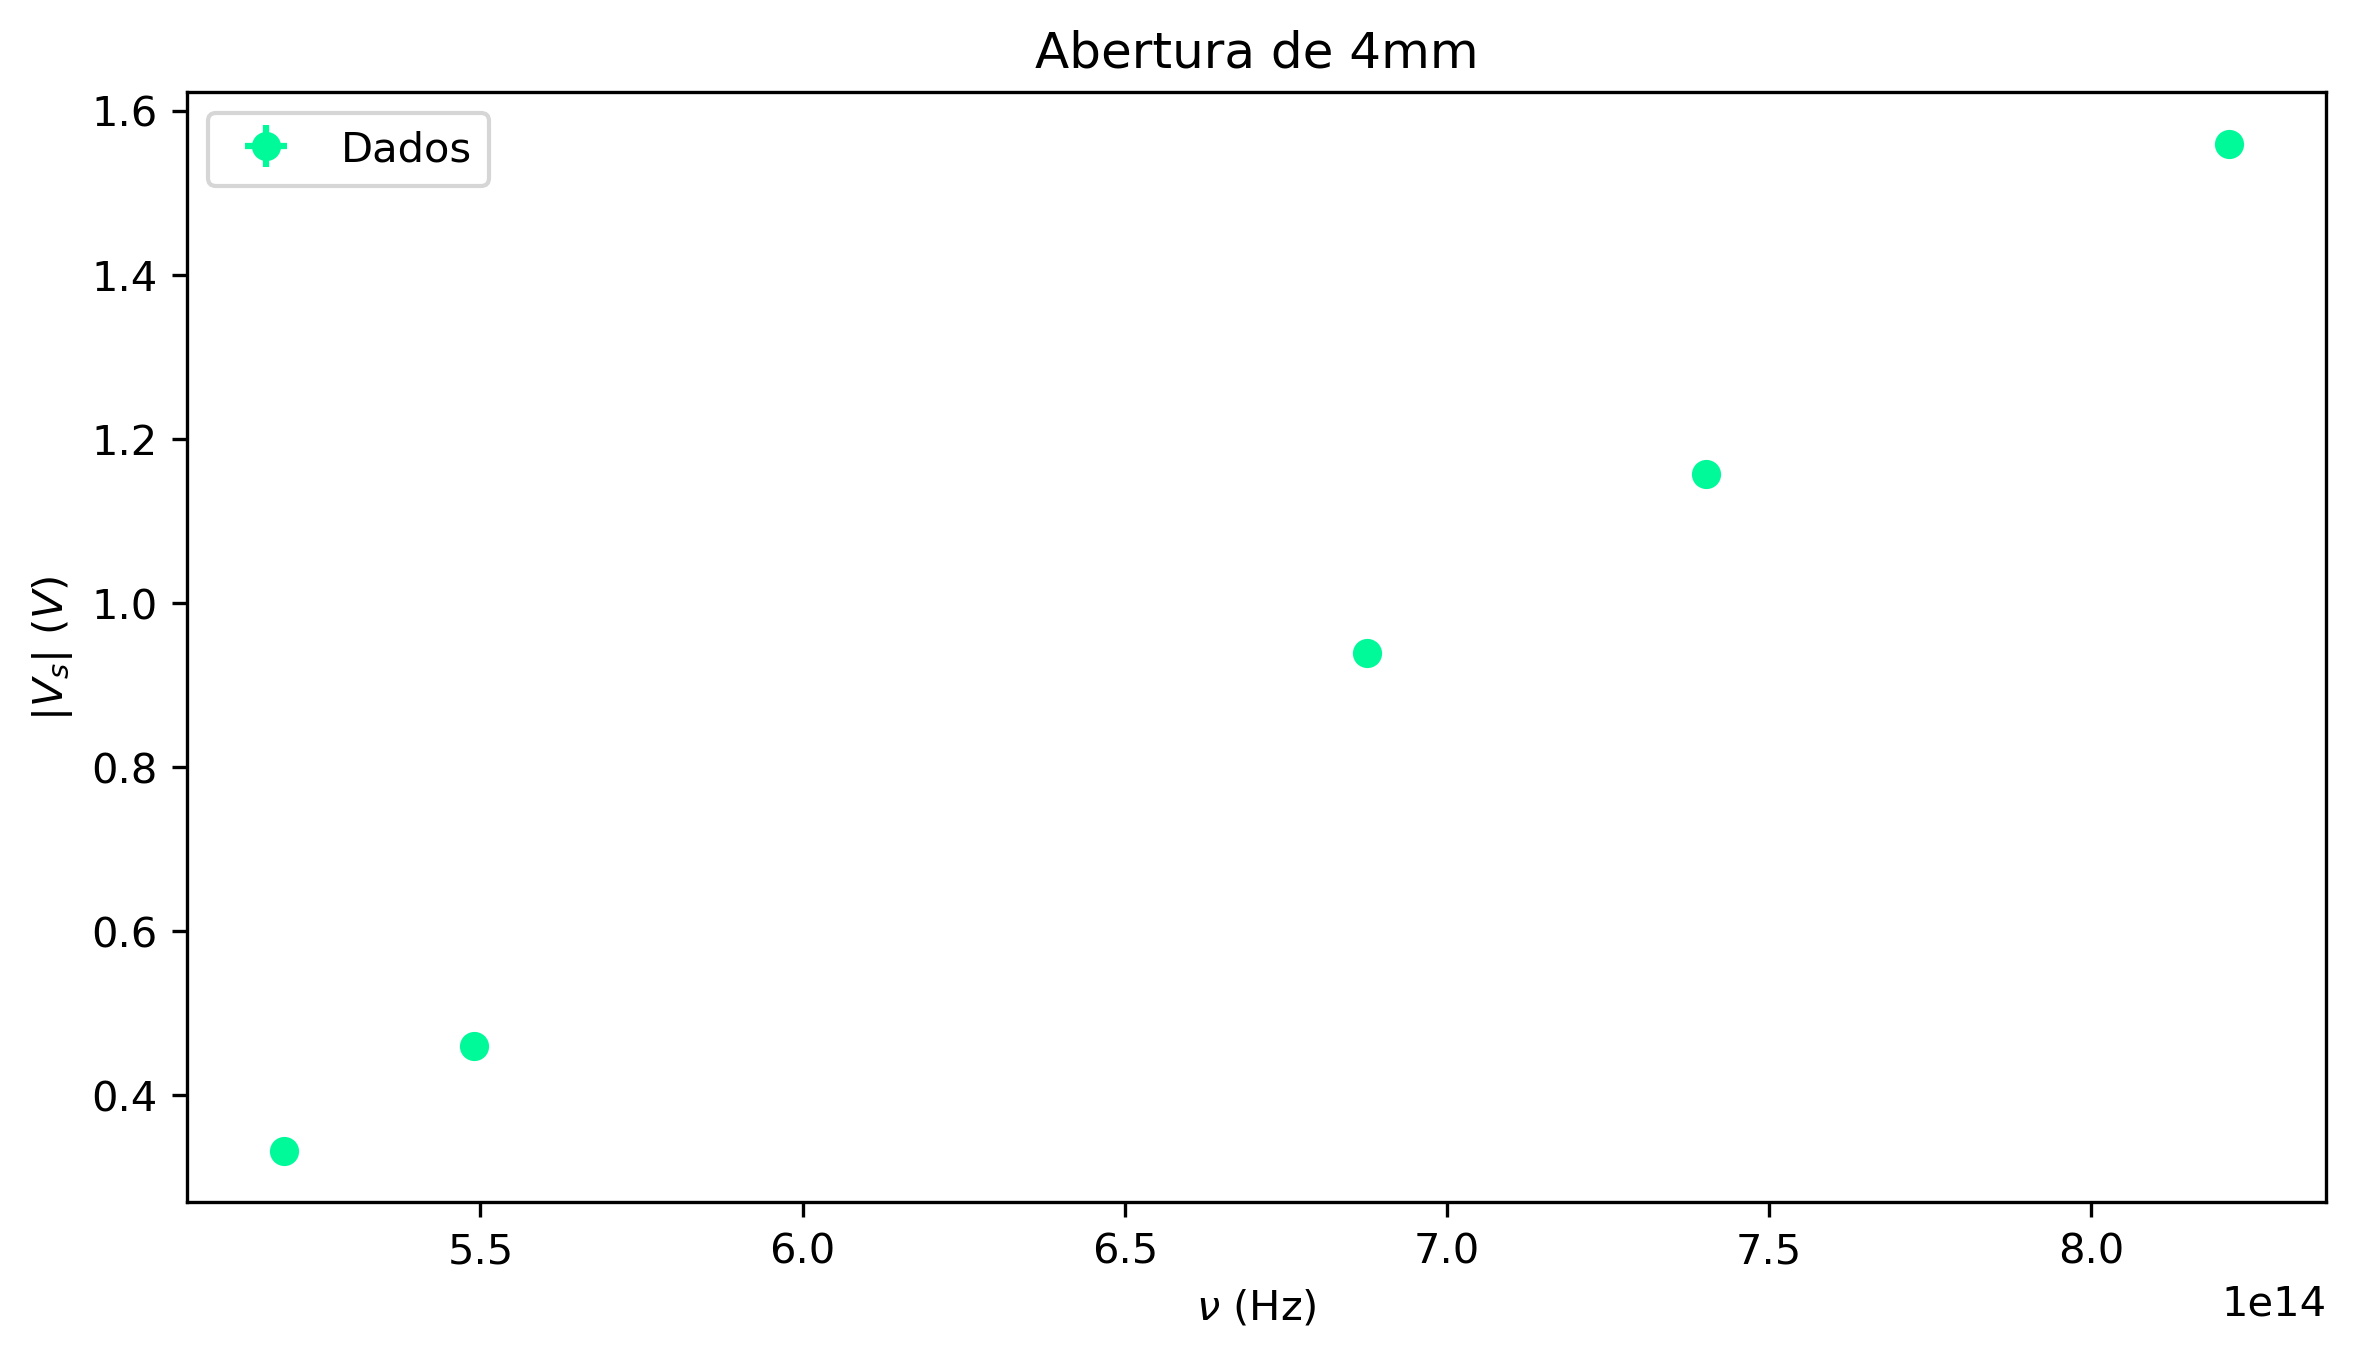

In [5]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s),sigma_v_s,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.ylabel(r'$|V_s|$ ($V$)')
plt.xlabel(r'$\nu$ (Hz)')
plt.title('Abertura de 4mm')
plt.legend()
plt.show()

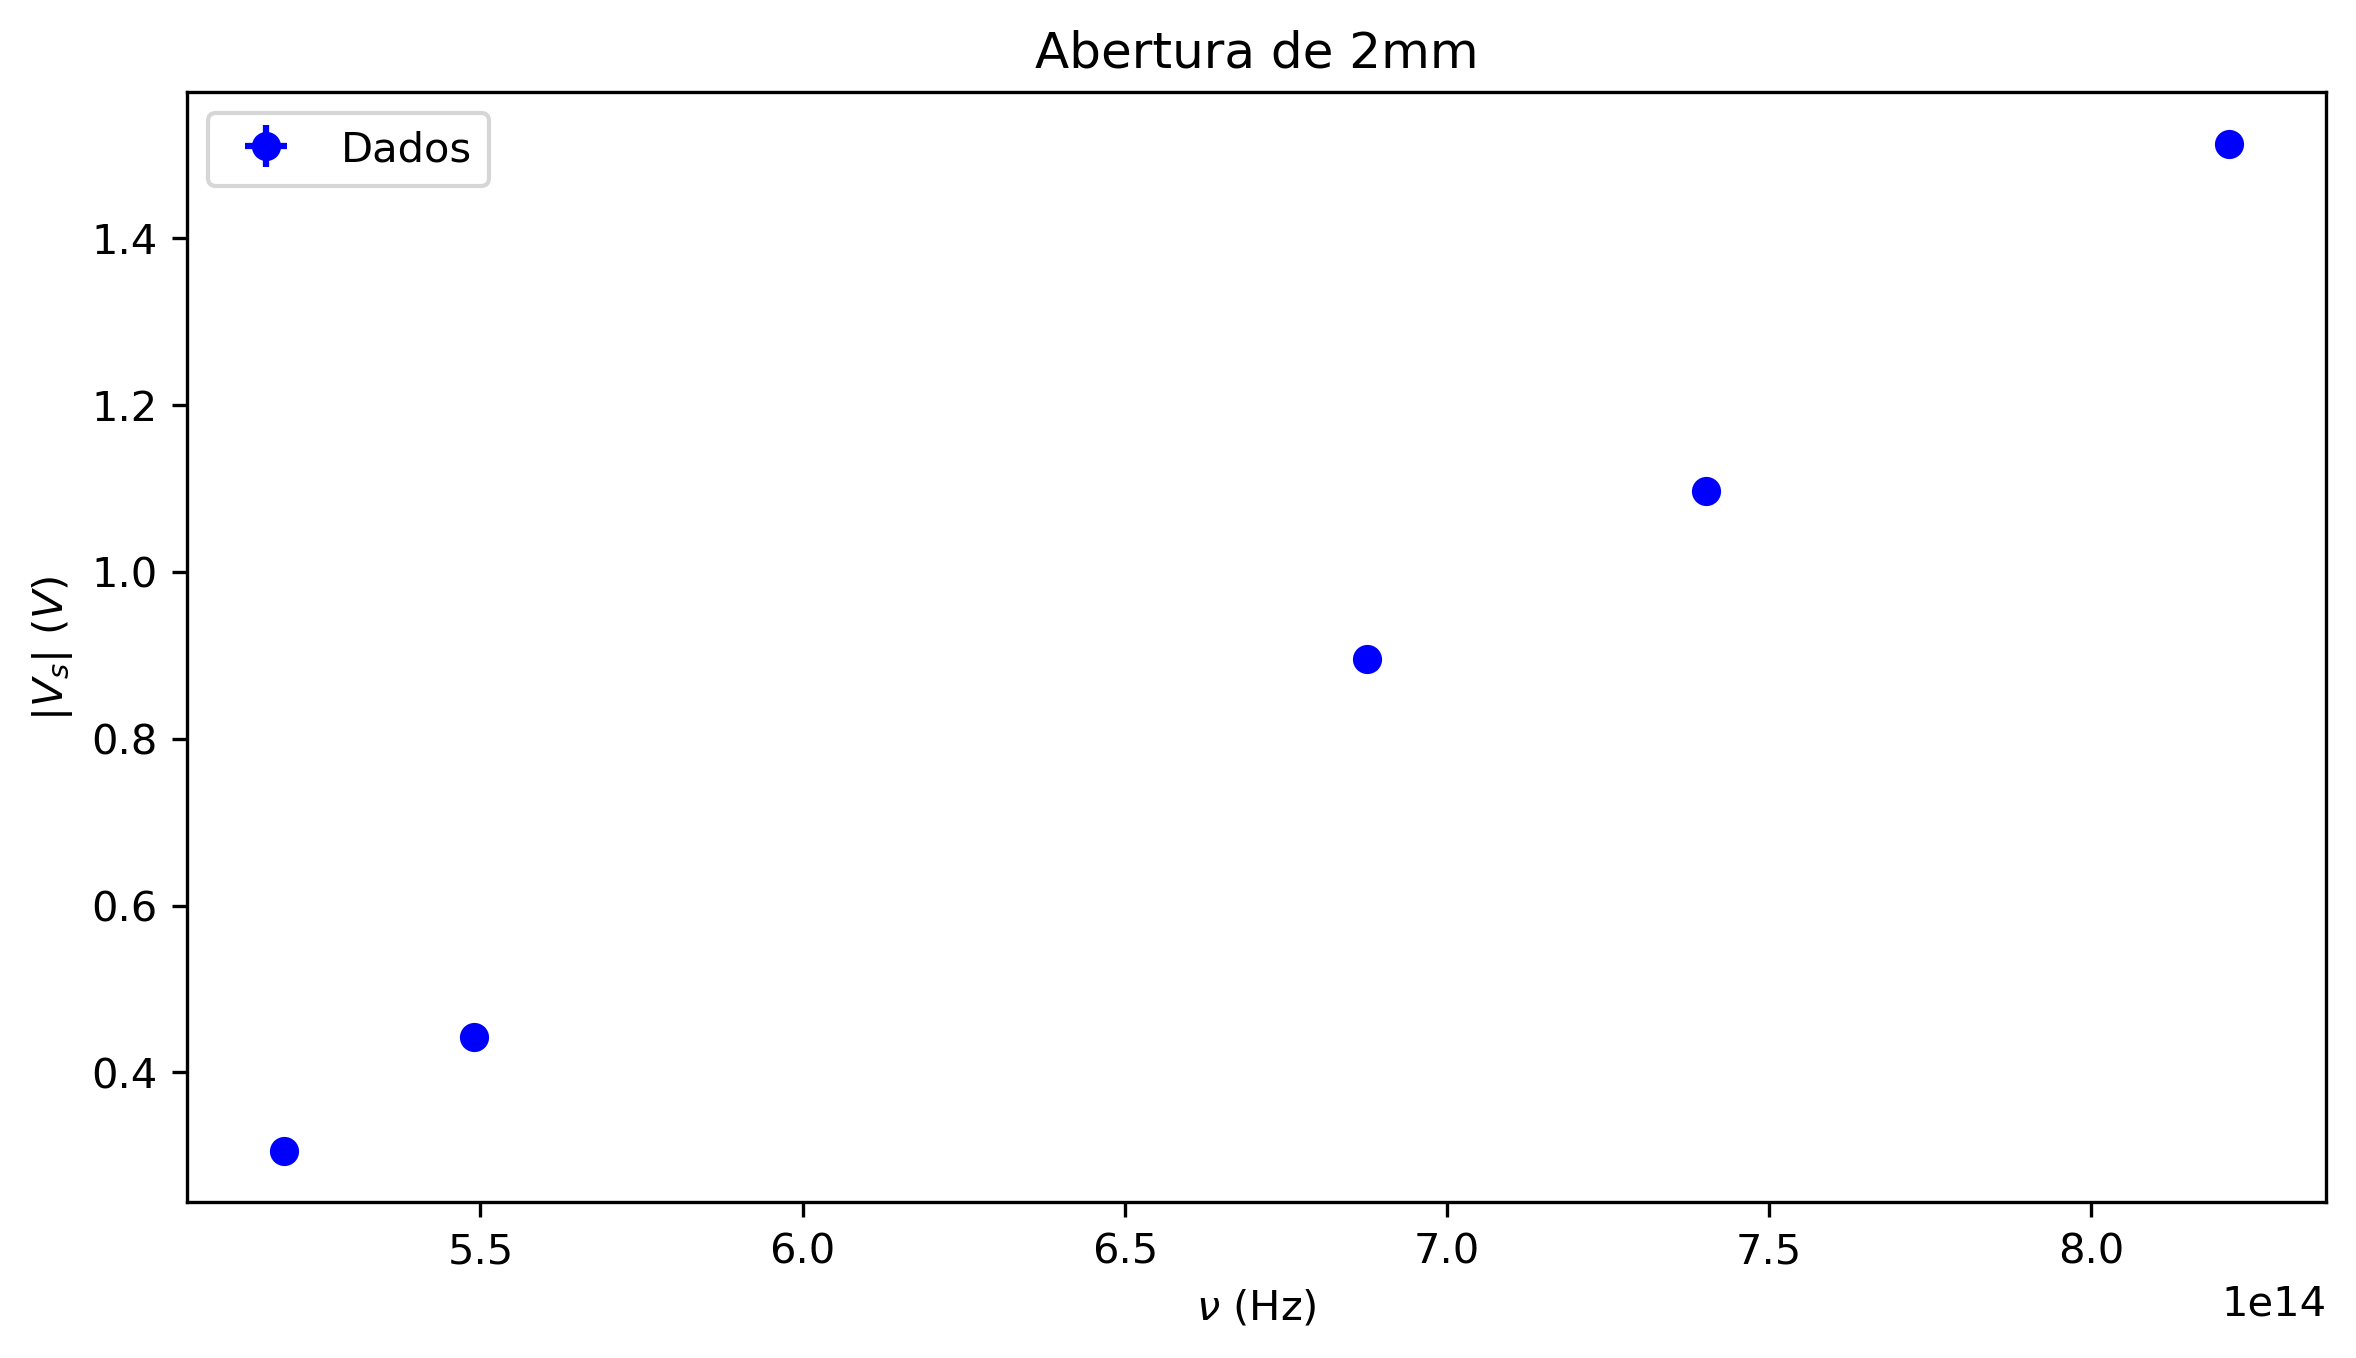

In [6]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s2),sigma_v_s,0, 'o', color = 'blue', label = 'Dados')
plt.ylabel(r'$|V_s|$ ($V$)')
plt.xlabel(r'$\nu$ (Hz)')
plt.title('Abertura de 2mm')
plt.legend()
plt.show()

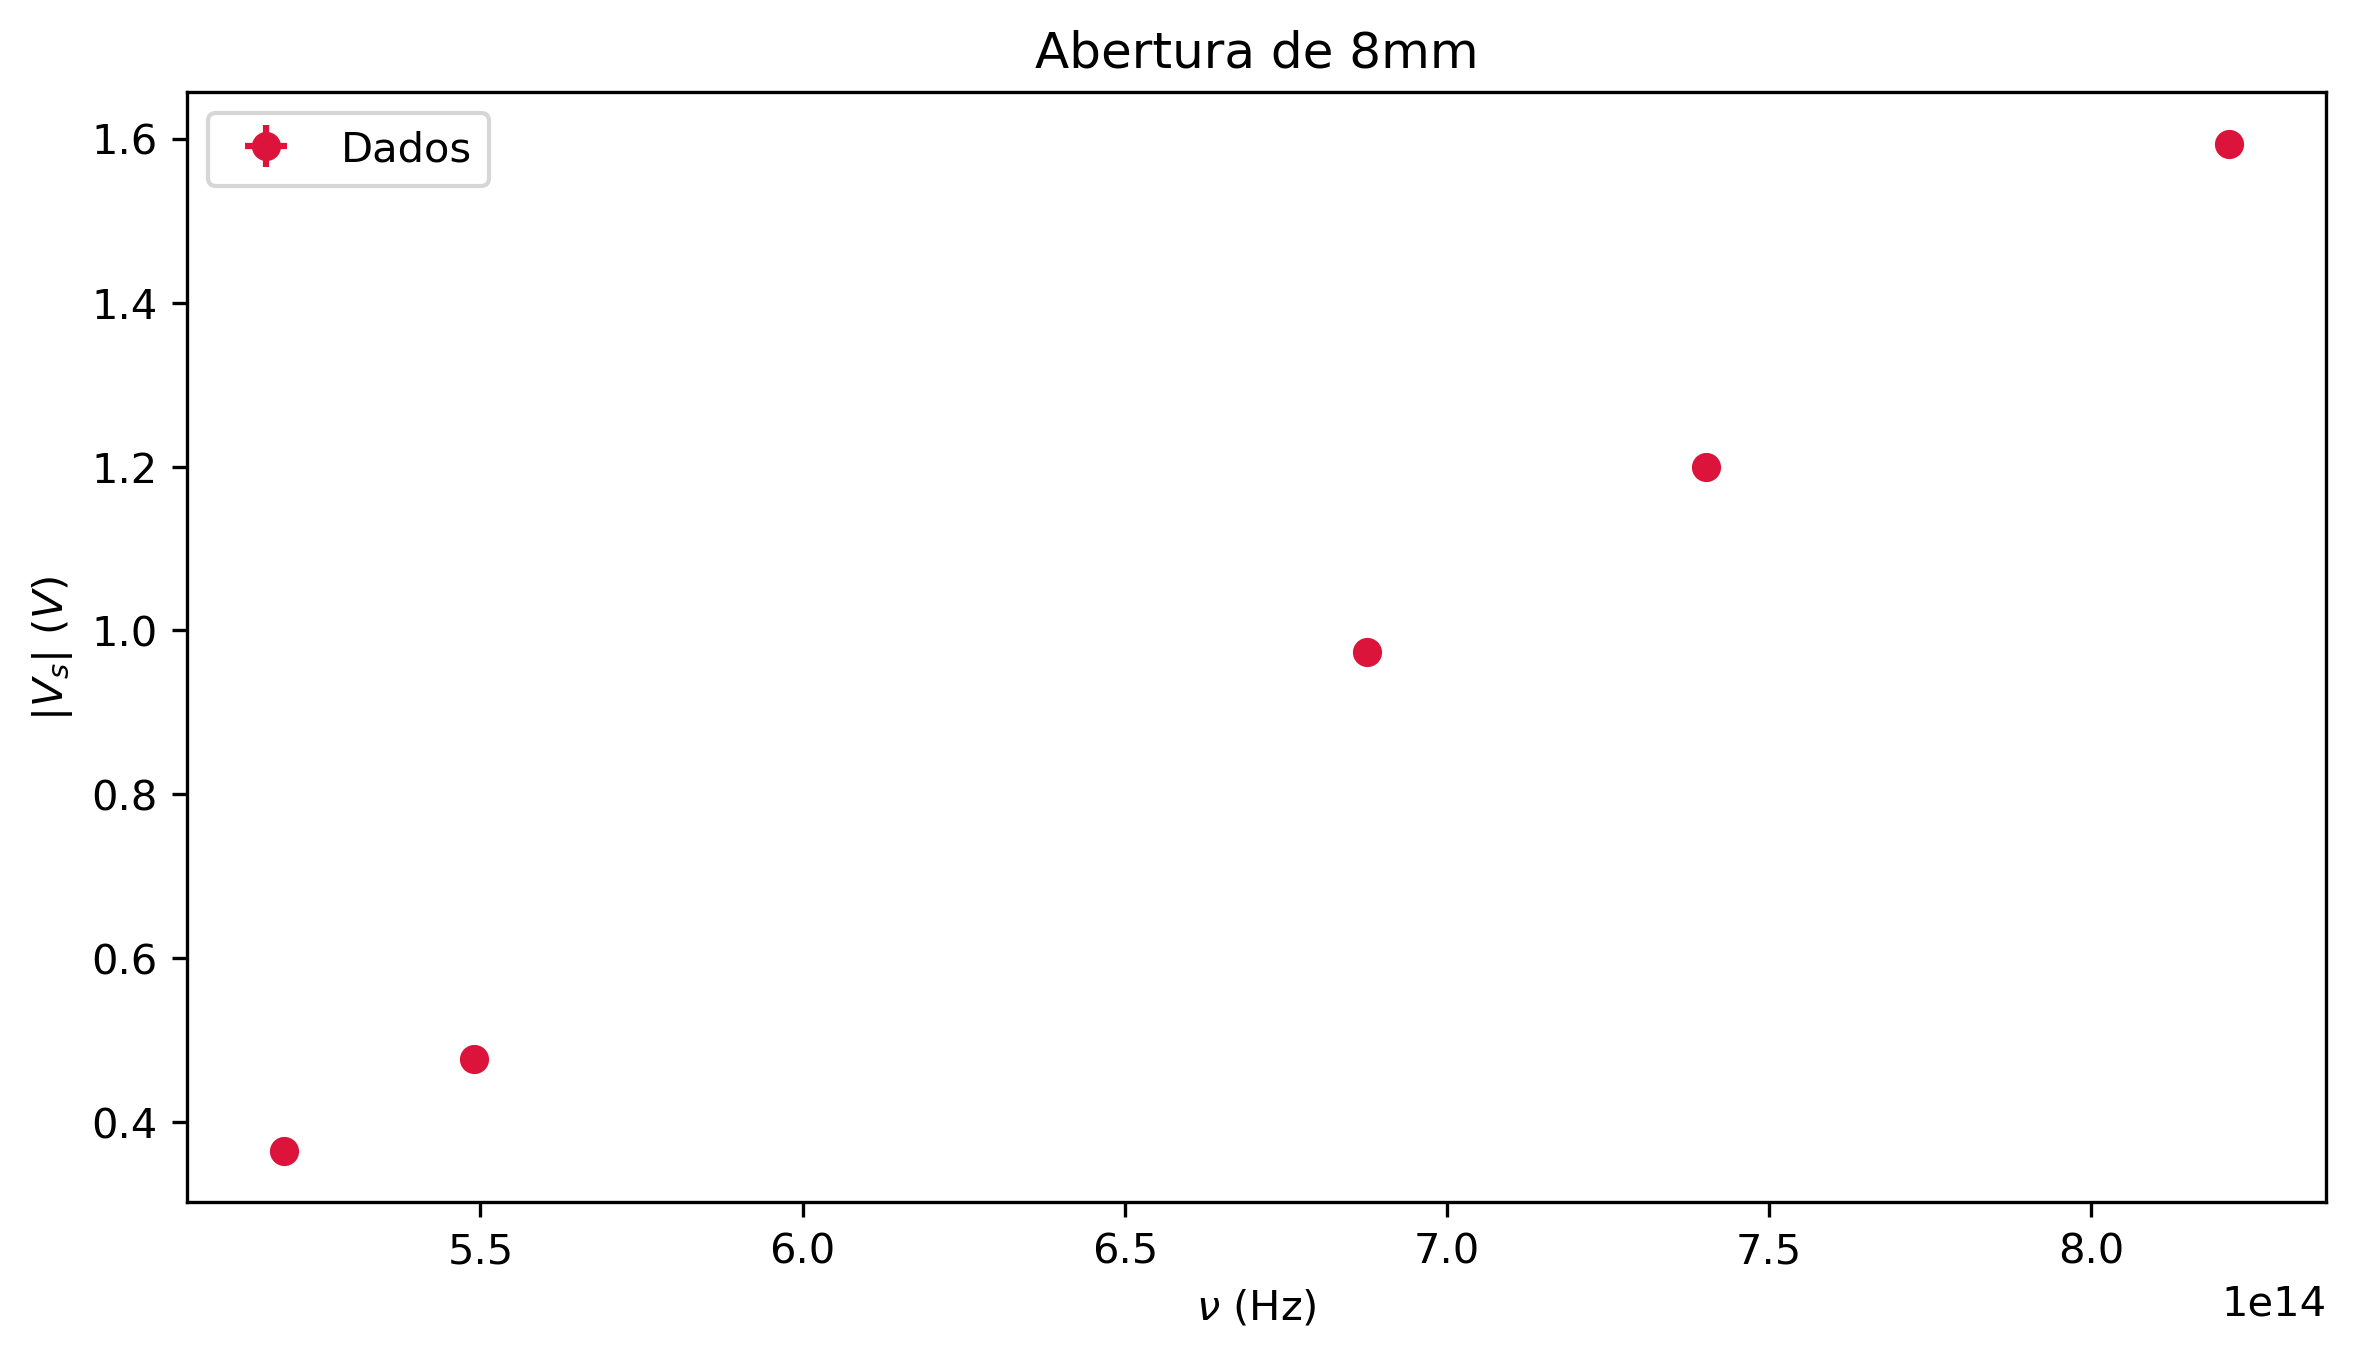

In [7]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s8),sigma_v_s,0, 'o', color = 'crimson', label = 'Dados')
plt.ylabel(r'$|V_s|$ ($V$)')
plt.xlabel(r'$\nu$ (Hz)')
plt.title('Abertura de 8mm')
plt.legend()
plt.show()

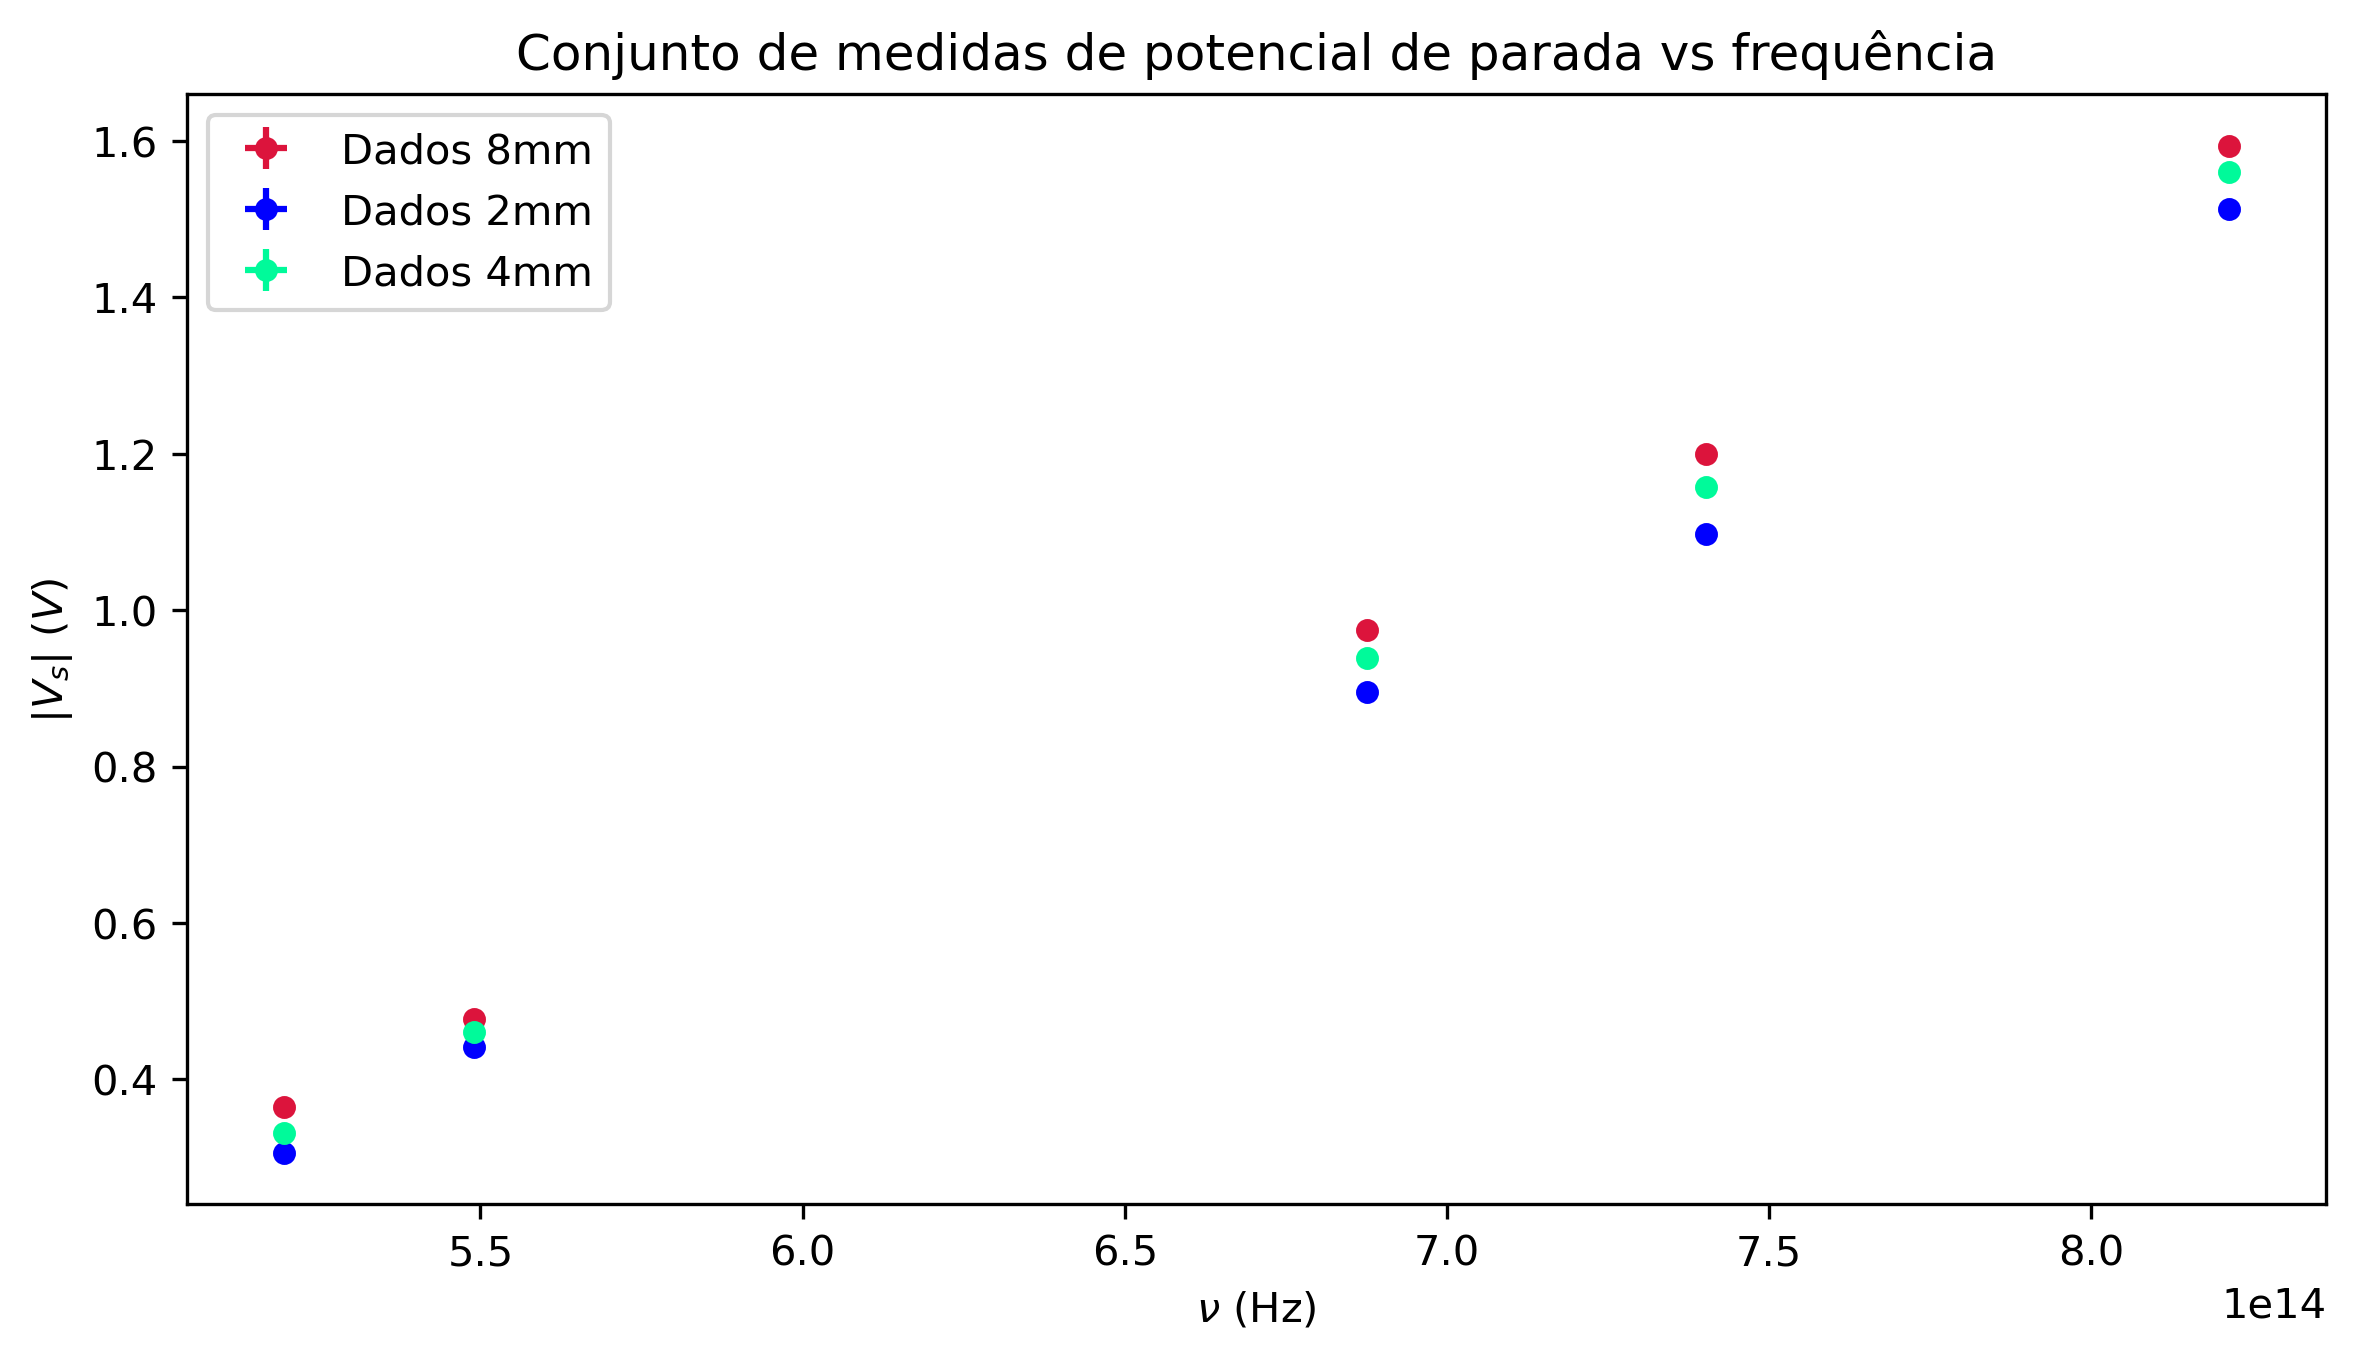

In [42]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s8),sigma_v_s,0, 'o', ms = 4.5, color = 'crimson', label = 'Dados 8mm')
plt.errorbar(f,abs(v_s2),sigma_v_s,0, 'o', ms = 4.5,color = 'blue', label = 'Dados 2mm')
plt.errorbar(f,abs(v_s),sigma_v_s,0, 'o', ms = 4.5, color = 'Mediumspringgreen', label = 'Dados 4mm')
plt.ylabel(r'$|V_s|$ ($V$)')
plt.xlabel(r'$\nu$ (Hz)')
plt.title('Conjunto de medidas de potencial de parada vs frequência')
plt.legend()
plt.savefig('Graphs/photoelectric/P1_Dados_Txf_4mm.pdf')
plt.show()

## Ajuste linear 4mm

In [9]:
fitpars, cov_pars = np.polyfit(f,abs(v_s),1,w=np.power(sigma_v_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.2g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.2g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.17f +- %.17f (V s)' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.2f +- %.2f (V)' %(coef_linear,sigma_linear))

Coeficiente angular: 0.00000000000000394 +- 0.00000000000000018 (V s)
Coeficiente linear: -1.73 +- 0.12 (V)


## Ajuste linear 2 mm

In [10]:
fitpars2, cov_pars2 = np.polyfit(f,abs(v_s2),1,w=np.power(sigma_v_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular2 = fitpars2[0]
coef_linear2 = fitpars2[1]
sigma_angular2 = np.sqrt(cov_pars2[0][0])
sigma_linear2 = np.sqrt(cov_pars2[1][1])

sigma_angular2 = float('{:g}'.format(float('{:.2g}'.format(sigma_angular2))))
sigma_linear2 = float('{:g}'.format(float('{:.2g}'.format(sigma_linear2))))

                     
print('Coeficiente angular: %.17f +- %.17f (V s)' % (coef_angular2 ,sigma_angular2))
print('Coeficiente linear: %.2f +- %.2f (V)' %(coef_linear2,sigma_linear2))

Coeficiente angular: 0.00000000000000383 +- 0.00000000000000021 (V s)
Coeficiente linear: -1.69 +- 0.14 (V)


## Ajuste linear 8mm

In [11]:
fitpars8, cov_pars8 = np.polyfit(f,abs(v_s8),1,w=np.power(sigma_v_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular8 = fitpars8[0]
coef_linear8 = fitpars8[1]
sigma_angular8 = np.sqrt(cov_pars8[0][0])
sigma_linear8 = np.sqrt(cov_pars8[1][1])

sigma_angular8 = float('{:g}'.format(float('{:.2g}'.format(sigma_angular8))))
sigma_linear8 = float('{:g}'.format(float('{:.2g}'.format(sigma_linear8))))

                     
print('Coeficiente angular: %.17f +- %.17f (V s)' % (coef_angular8 ,sigma_angular8))
print('Coeficiente linear: %.2f +- %.2f (V)' %(coef_linear8,sigma_linear8))

Coeficiente angular: 0.00000000000000398 +- 0.00000000000000016 (V s)
Coeficiente linear: -1.72 +- 0.11 (V)


## Gráfico para  os ajustes lineares

In [12]:
x = np.arange(5e14,8.5e14,1e12)

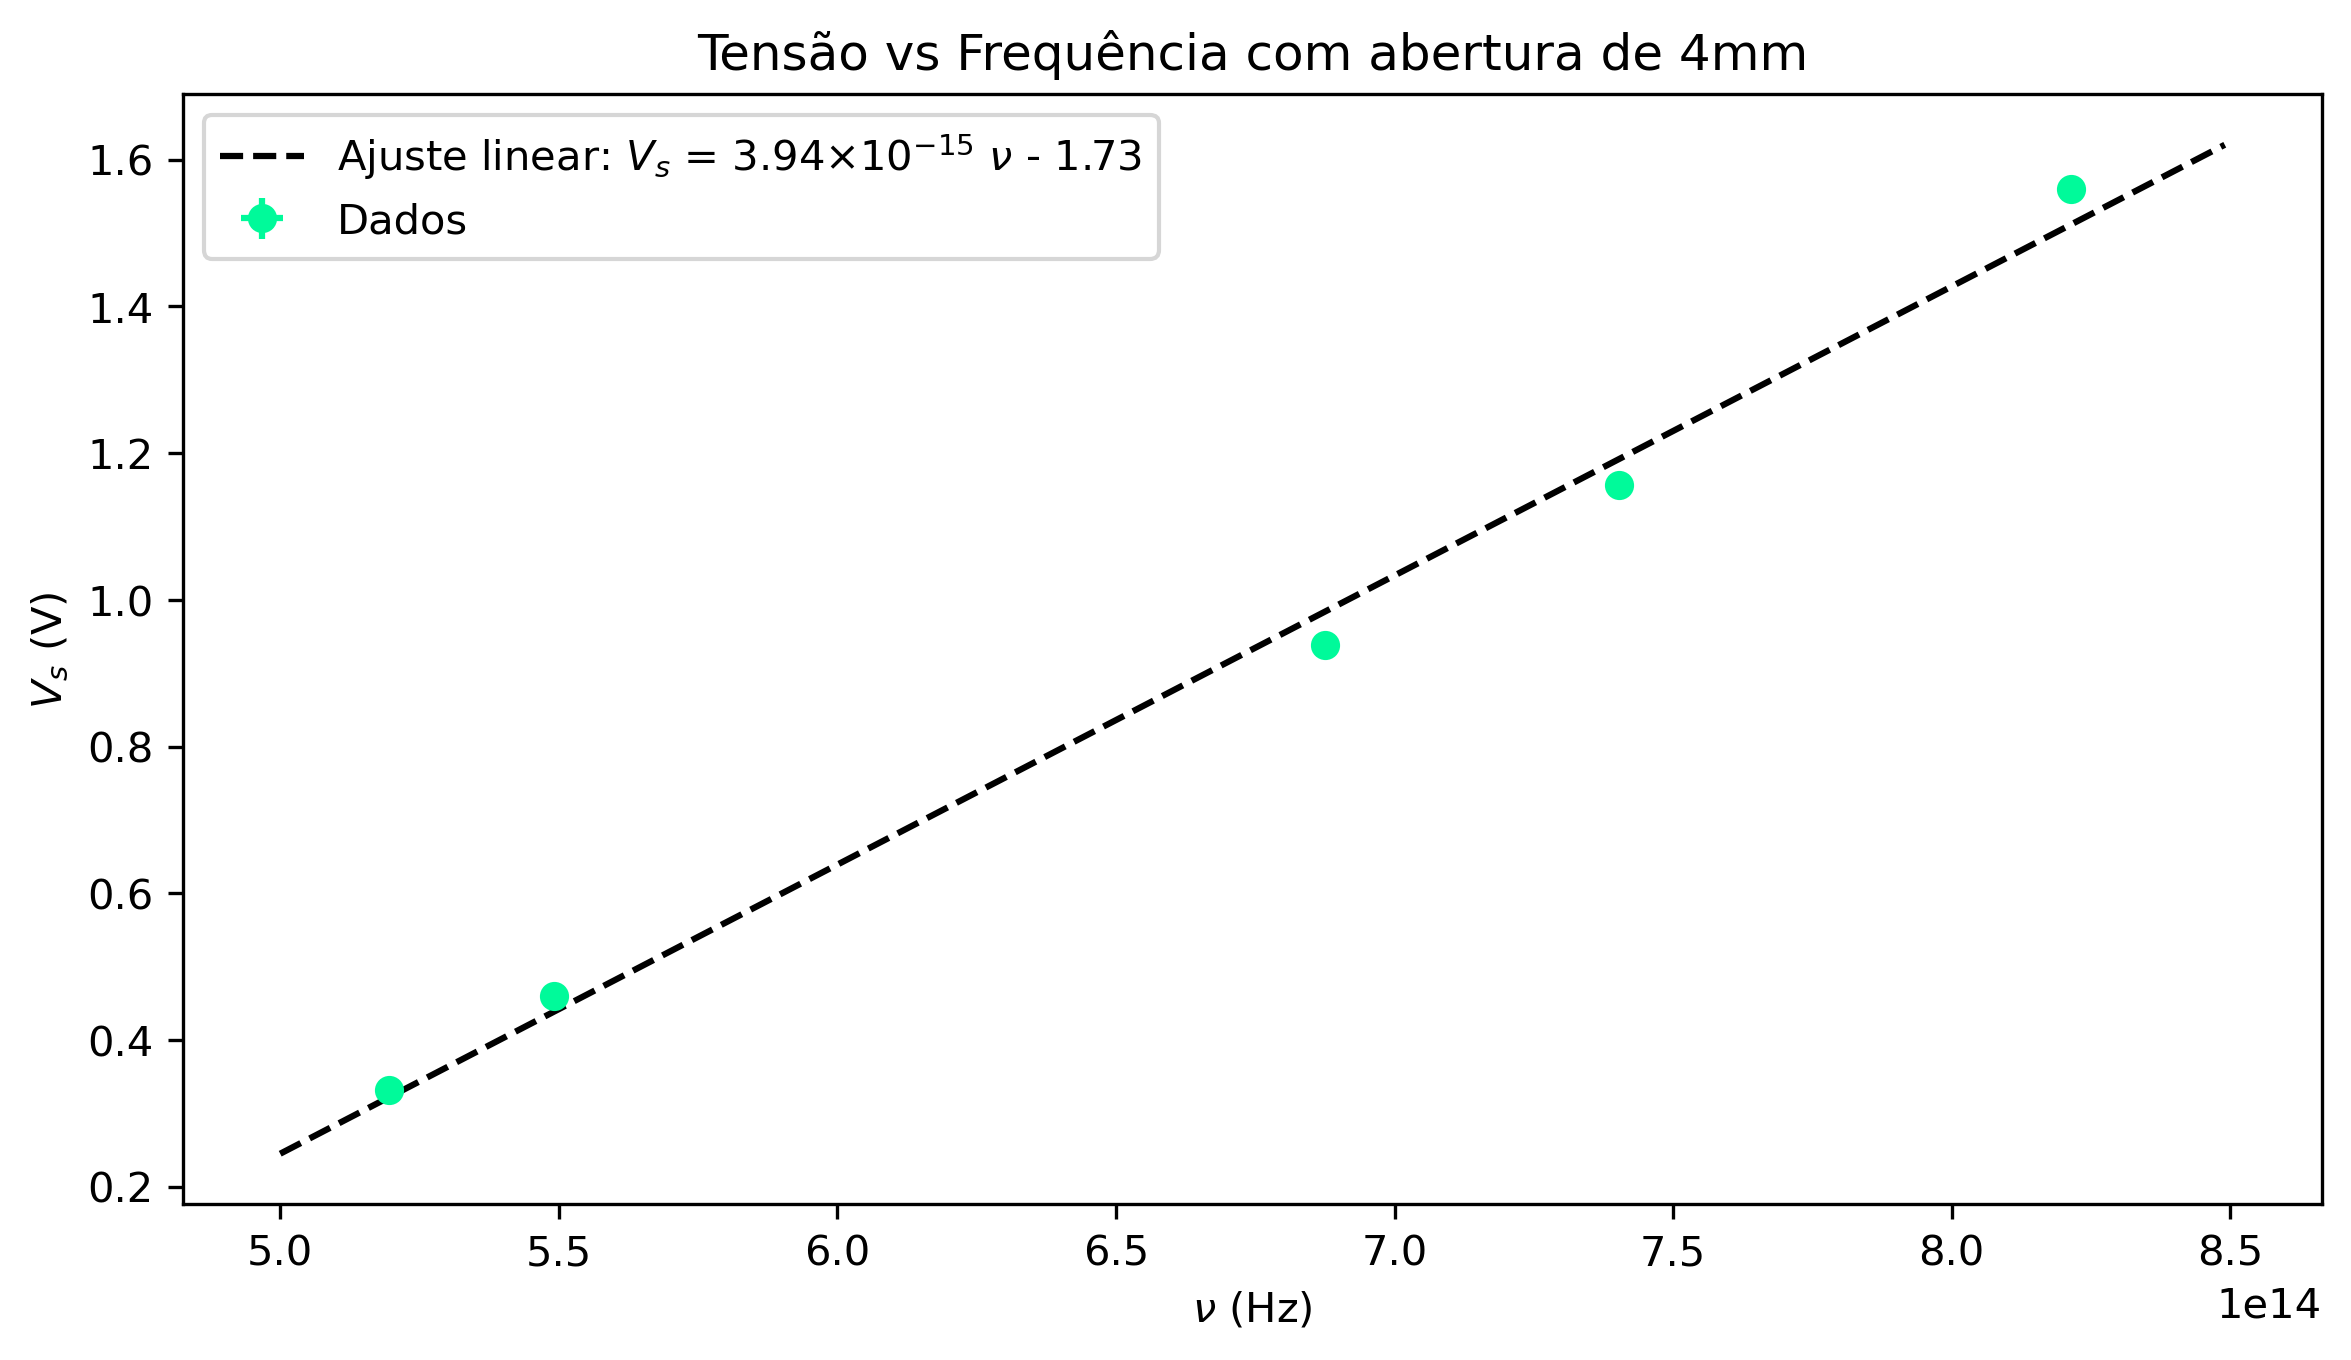

In [56]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s),sigma_v_s,0, 'o', color = 'Mediumspringgreen', label = 'Dados')
plt.plot(x,x*coef_angular + coef_linear, color ='black', ls = '--', label = r'Ajuste linear: $V_s$ = %.2f$\times 10^{-15}$ $\nu$ - %.2f' % (coef_angular/1e-15,abs(coef_linear)))
plt.ylabel(r'$V_s$ (V)')
plt.xlabel(r'$\nu$ (Hz)')
plt.title('Tensão vs Frequência com abertura de 4mm')
plt.legend()
plt.savefig('Graphs/photoelectric/P1_Txf_4mm.pdf')
plt.show()

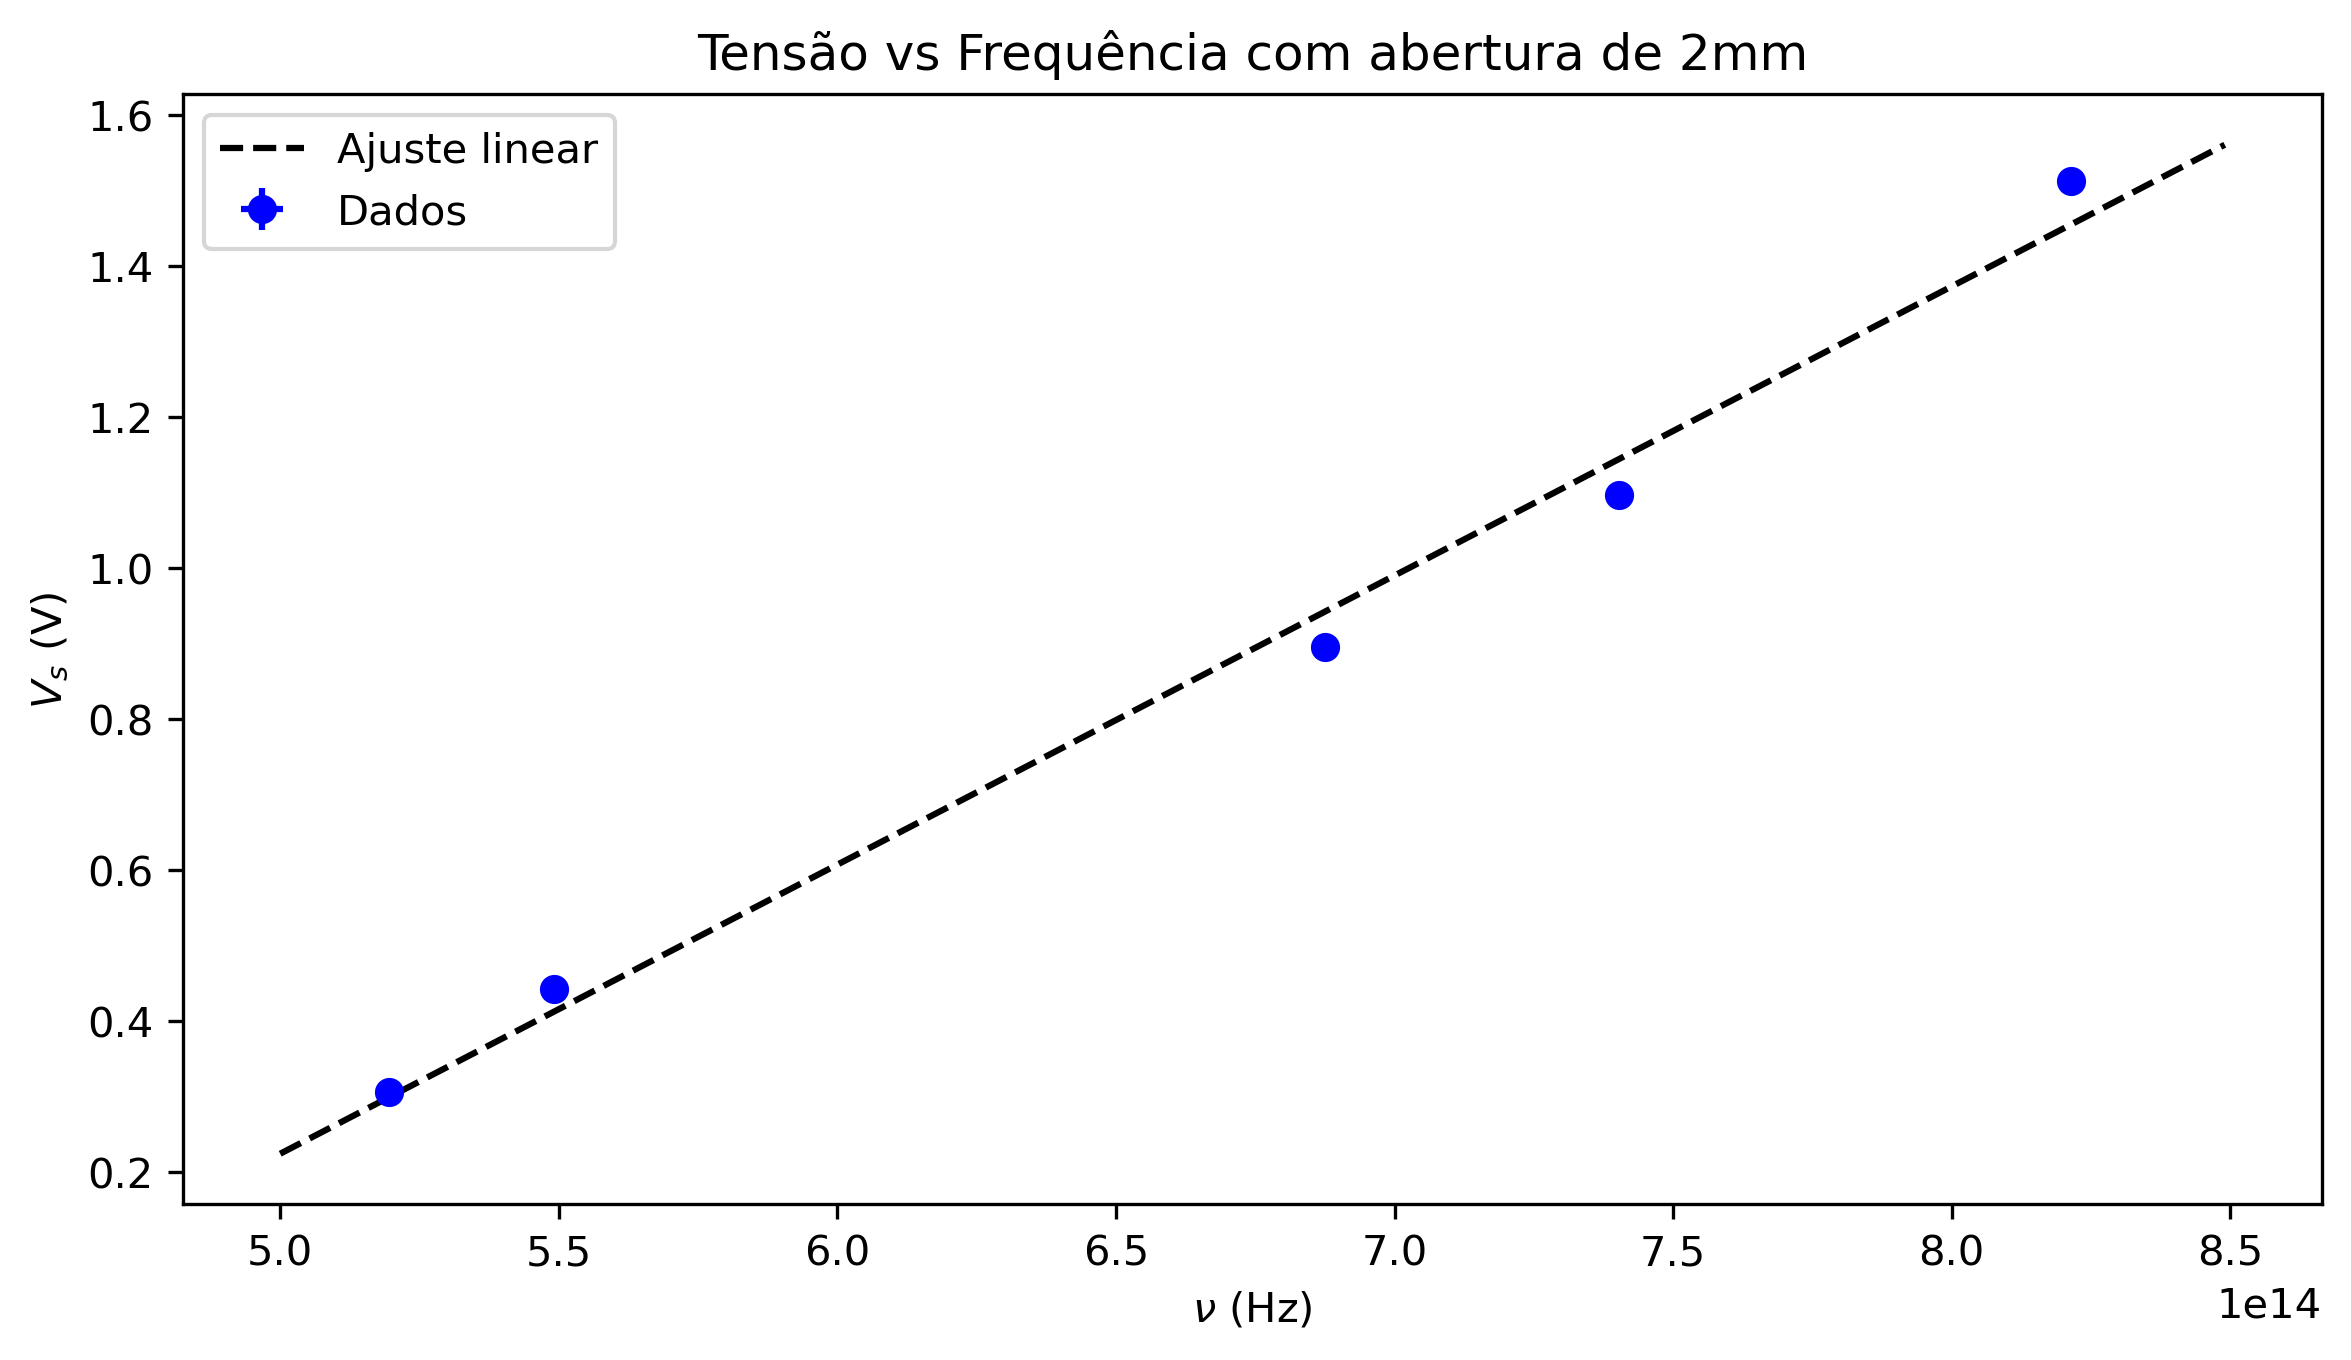

In [14]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s2),sigma_v_s,0, 'o', color = 'blue', label = 'Dados')
plt.plot(x,x*coef_angular2 + coef_linear2, color ='black', ls = '--', label = r'Ajuste linear')
plt.ylabel(r'$V_s$ (V)')
plt.xlabel(r'$\nu$ (Hz)')
plt.title('Tensão vs Frequência com abertura de 2mm')
plt.legend()
plt.savefig('Graphs/photoelectric/P1_Txf_2mm.pdf')
plt.show()

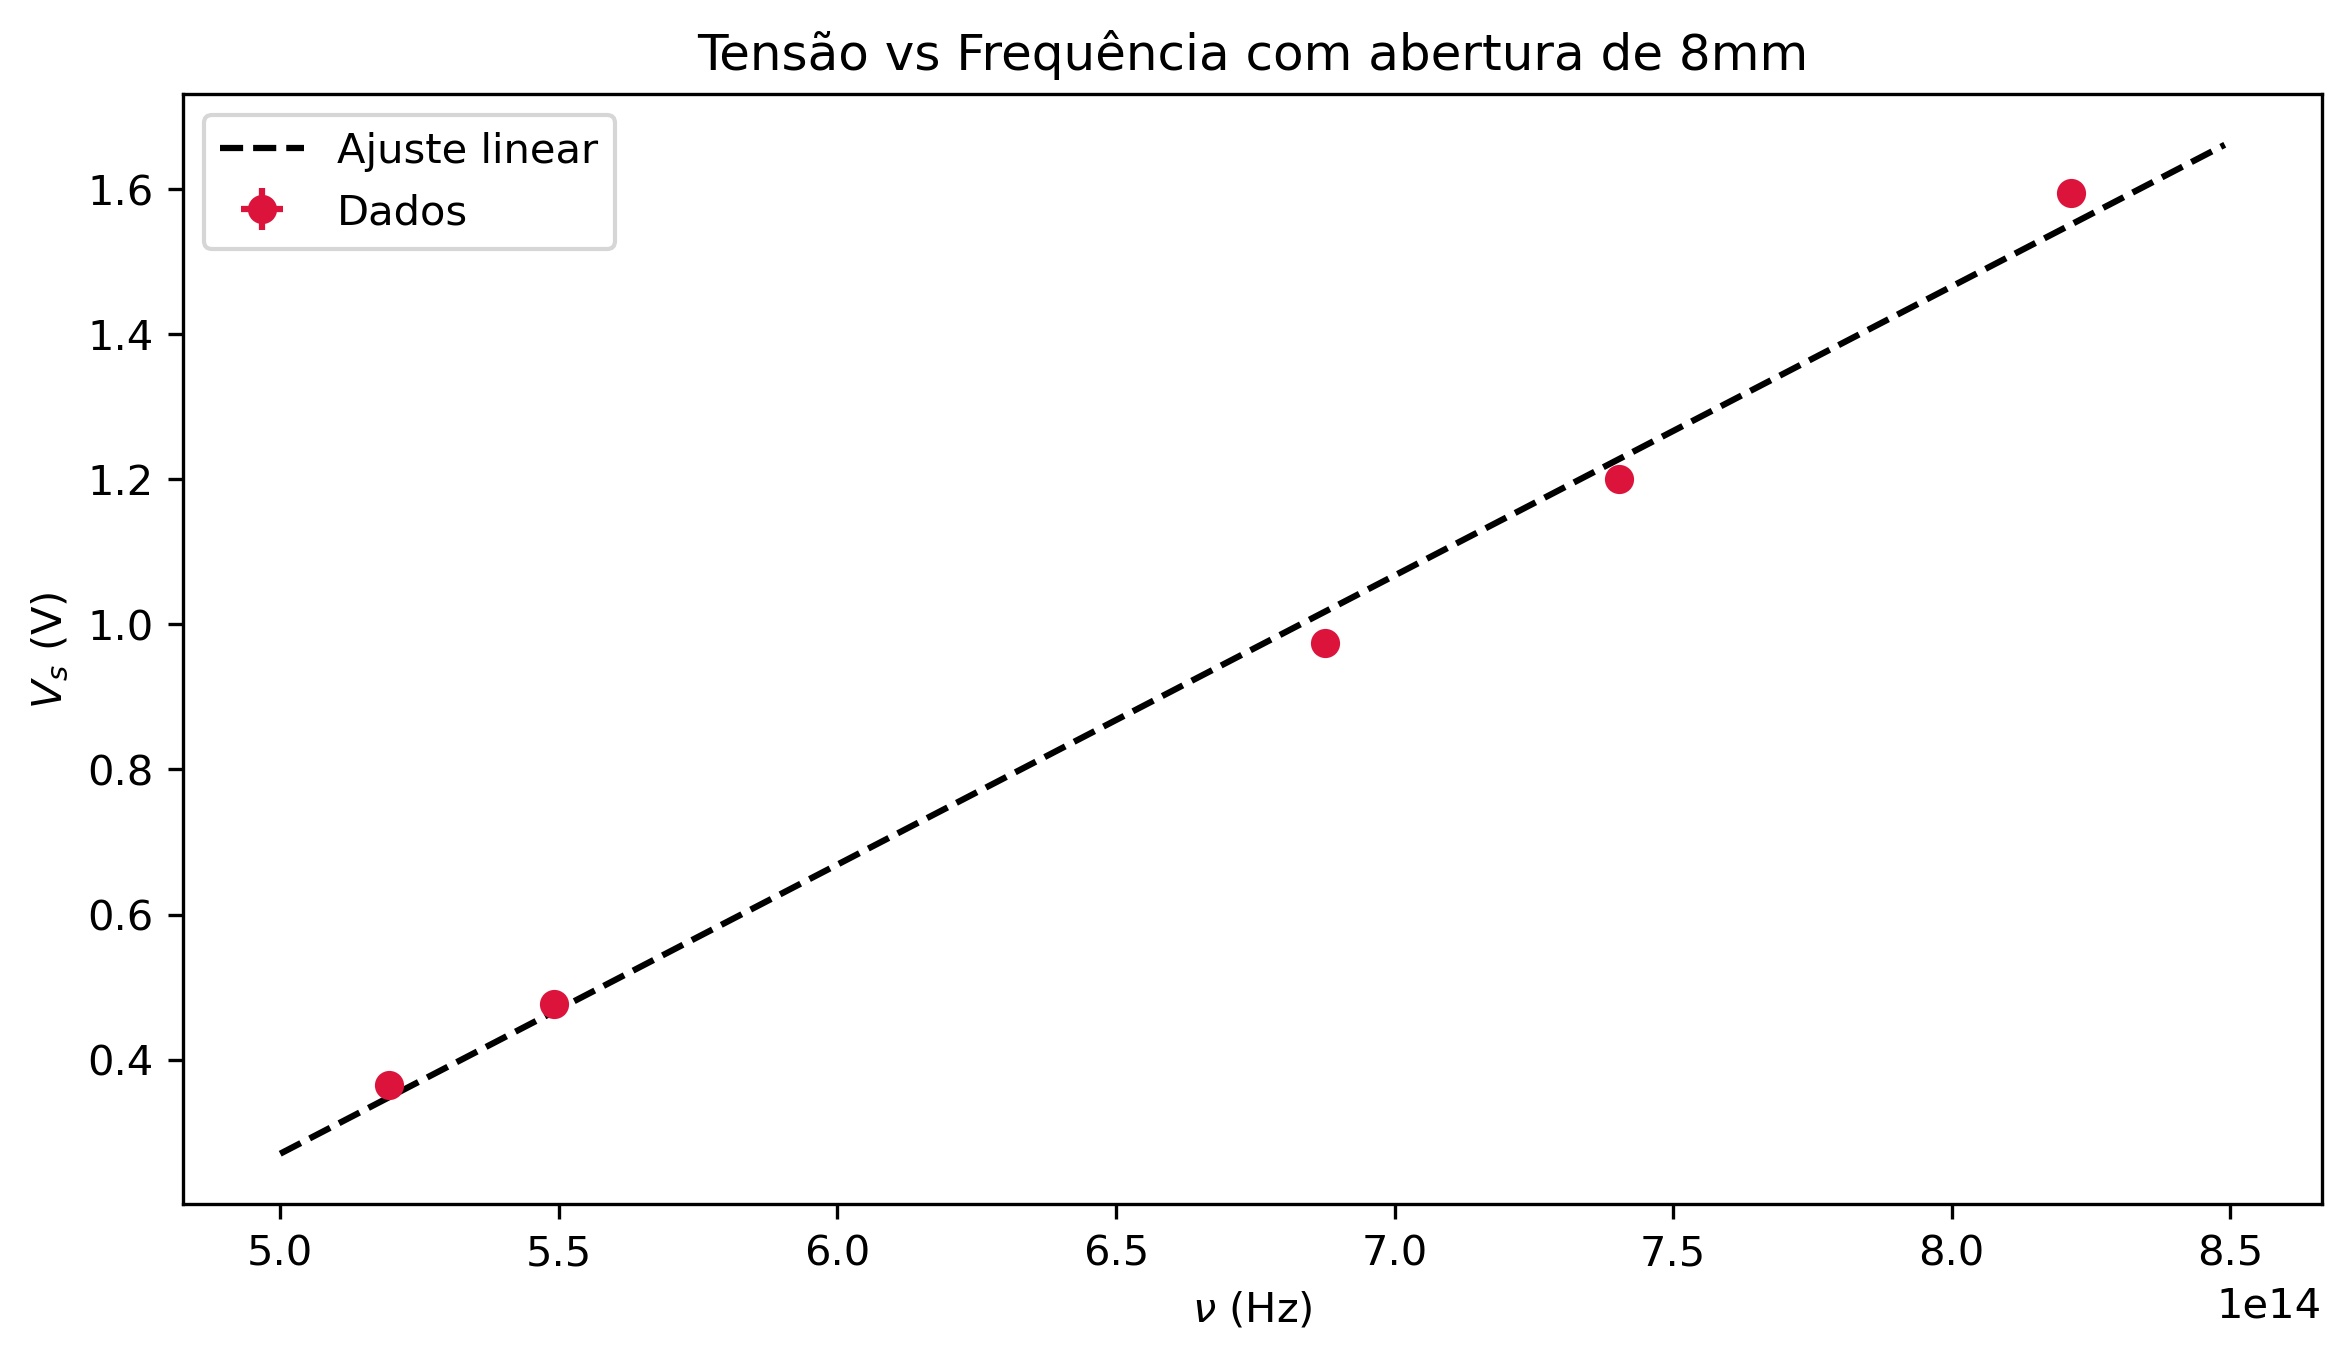

In [15]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(f,abs(v_s8),sigma_v_s,0, 'o', color = 'crimson', label = 'Dados')
plt.plot(x,x*coef_angular8 + coef_linear8, color ='black', ls = '--', label = r'Ajuste linear')
plt.ylabel(r'$V_s$ (V)')
plt.xlabel(r'$\nu$ (Hz)')
plt.title('Tensão vs Frequência com abertura de 8mm')
plt.legend()
plt.savefig('Graphs/photoelectric/P1_Txf_8mm.pdf')
plt.show()

## Determinando a constante de Planck

Nós sabemos que o modelo teórico para o efeito fotoelétrico é:

$$V_s = \frac{h}{e} \nu + \frac{\Phi_0}{e}$$

Comparando com o ajuste obtido ($V_s = c_a \nu - c_l $), nós vemos que:

$$\frac{h}{e} = c_a \implies h = c_a \ e$$
$$\frac{\Phi_0}{e} = c_l \implies \Phi_0 = c_l \ e$$

Neste experimento queremos encontrar o valor da constante de Planck, por isso focaremos na primeira equação. Para obtermos o erro associado a $h$, podemos propagar a incerteza de $c_a$ da seguinte forma:

$$\sigma_{h} = \sqrt{\left(\frac{\partial h}{\partial c_a}\right)^2\sigma_{c_a}^2}$$

$$\sigma_{h} = \sqrt{\left(\frac{\partial c_a \ e}{\partial c_a}\right)^2\sigma_{c_a}^2}$$
$$\sigma_{h} = \sqrt{e^2\sigma_{c_a}^2}$$
$$\sigma_{h} = e \ \sigma_{c_a}$$

Abertura | Constante de Planck $10^{-34}$(Js) | Incerteza $10^{-34}$(Js)
:-:|:-:|:-:
2mm |6.14 | 0.34 
4mm |6.31 | 0.29 
8mm |6.38 | 0.16 



In [16]:
print(np.sqrt(0.34**2+0.29**2+0.16**2))

0.47465777145223276


In [17]:
e = 1.602e-19

#Calculando h
h = np.array([coef_angular*e, coef_angular2*e, coef_angular8*e])

#Calculando a incerteza de h e arredondando para dois algarismos significativos
sigma_h = np.array([e*sigma_angular, e*sigma_angular2, e*sigma_angular8])
sigma_h = [float('{:g}'.format(float('{:.2g}'.format(sigma)))) for sigma in sigma_h]

#Calculando o valor médio de $h$
h_mean = np.mean(h)

#Calculando a incerteza do valor médio de h
#Calculando a incerteza propagada:
sigma_h_mean = 0
for s in sigma_h:
    sigma_h_mean += s**2
sigma_h_mean = np.sqrt(sigma_h_mean)/len(sigma_h)
#Arredondando para dois algarismos significativos
sigma_h_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_h_mean))))

#Juntando com a estatística
print('estatístico: ', np.std(h)/(len(h)-1), 'instrumental: ', sigma_h_mean)
sigma_h_mean = np.sqrt(sigma_h_mean**2 + (np.std(h)/(len(h)-1))**2)
sigma_h_mean = float('{:g}'.format(float('{:.2g}'.format(sigma_h_mean))))



#Exibindo o resultado
print(h,sigma_h)
print('h = (%.2f +- %.2f) 10^{-34} (J s)' % (h_mean/1e-34,sigma_h_mean/1e-34))

estatístico:  5.215335358066094e-36 instrumental:  1.7e-35
[6.31382745e-34 6.13521558e-34 6.38273924e-34] [2.9e-35, 3.4e-35, 2.6e-35]
h = (6.28 +- 0.18) 10^{-34} (J s)


In [18]:
print('desvio =', 1 - h_mean/6.636e-34)

desvio = 0.05405956059495243


In [19]:
print(6.28+2*0.18)

6.640000000000001


# Experimento 2

## Dados coletados

In [20]:
#Tensão(2mm)
v_2 = np.array([-0.7])
v_2 = np.append(v_2,np.arange(0.7,19,1)) #V
print('V_2mm: ',v_2)
#Corrente(2mm)
i_2 = np.array([0.0, 2.6, 4.9, 7.6, 10.2, 11.7, 13.4, 15.3, 17.1, 18.7, 20.1, 21.2, 22.3, 
                23.3, 24.4, 24.8, 25.7, 26.4, 27.3, 27.7]) * 1e-11 #A

#Tensão(4mm)
v_4 = np.array(np.arange(-1, 18.5,1)) #V
print('V_4mm: ',v_4)
#Corrente(4mm)
i_4 = np.array([0, 3.7, 11.2, 19.6, 29.3, 37.3, 42.6, 48.7, 55.3, 61.2, 65.9, 70.6, 74.3,
                77.9, 81.8, 84.2, 87.2, 90.1, 94.2, 94.3]) * 1e-11 #A


#Tensão(8mm)
v_8 = np.array(np.arange(-1,18.5,1)) #V
print('V_8mm: ',v_8)
#Corrente(8mm)
#i_8 = np.array([0, 1.5, 4.5, 7.6, 12, 15.6, 17.4, 19.6, 22.4, 25.9, 29.4, 31.6, 33.4,
                #34.6, 35.2, 35.8, 35.1, 35.7, 36.3, 37.4]) * 1e-10 #A
i_8 = np.array([0, 1.9, 5, 8.6, 12.7, 16.1, 17.9, 20.3, 22.9, 25.1, 26.9, 28.9, 30.4, 
                31.8, 33.1, 34.2, 35.2,36.2, 37.2, 38.1]) * 1e-10

#Incertezas

sigma_V = np.full(len(v_2), 0.1) #V

sigma_I24 = np.full(len(i_2), 0.1e-11)

sigma_I8 = np.full(len(i_8),0.1e-10)

V_2mm:  [-0.7  0.7  1.7  2.7  3.7  4.7  5.7  6.7  7.7  8.7  9.7 10.7 11.7 12.7
 13.7 14.7 15.7 16.7 17.7 18.7]
V_4mm:  [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18.]
V_8mm:  [-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18.]


In [21]:
print(len(v_8) == len(i_8))

True


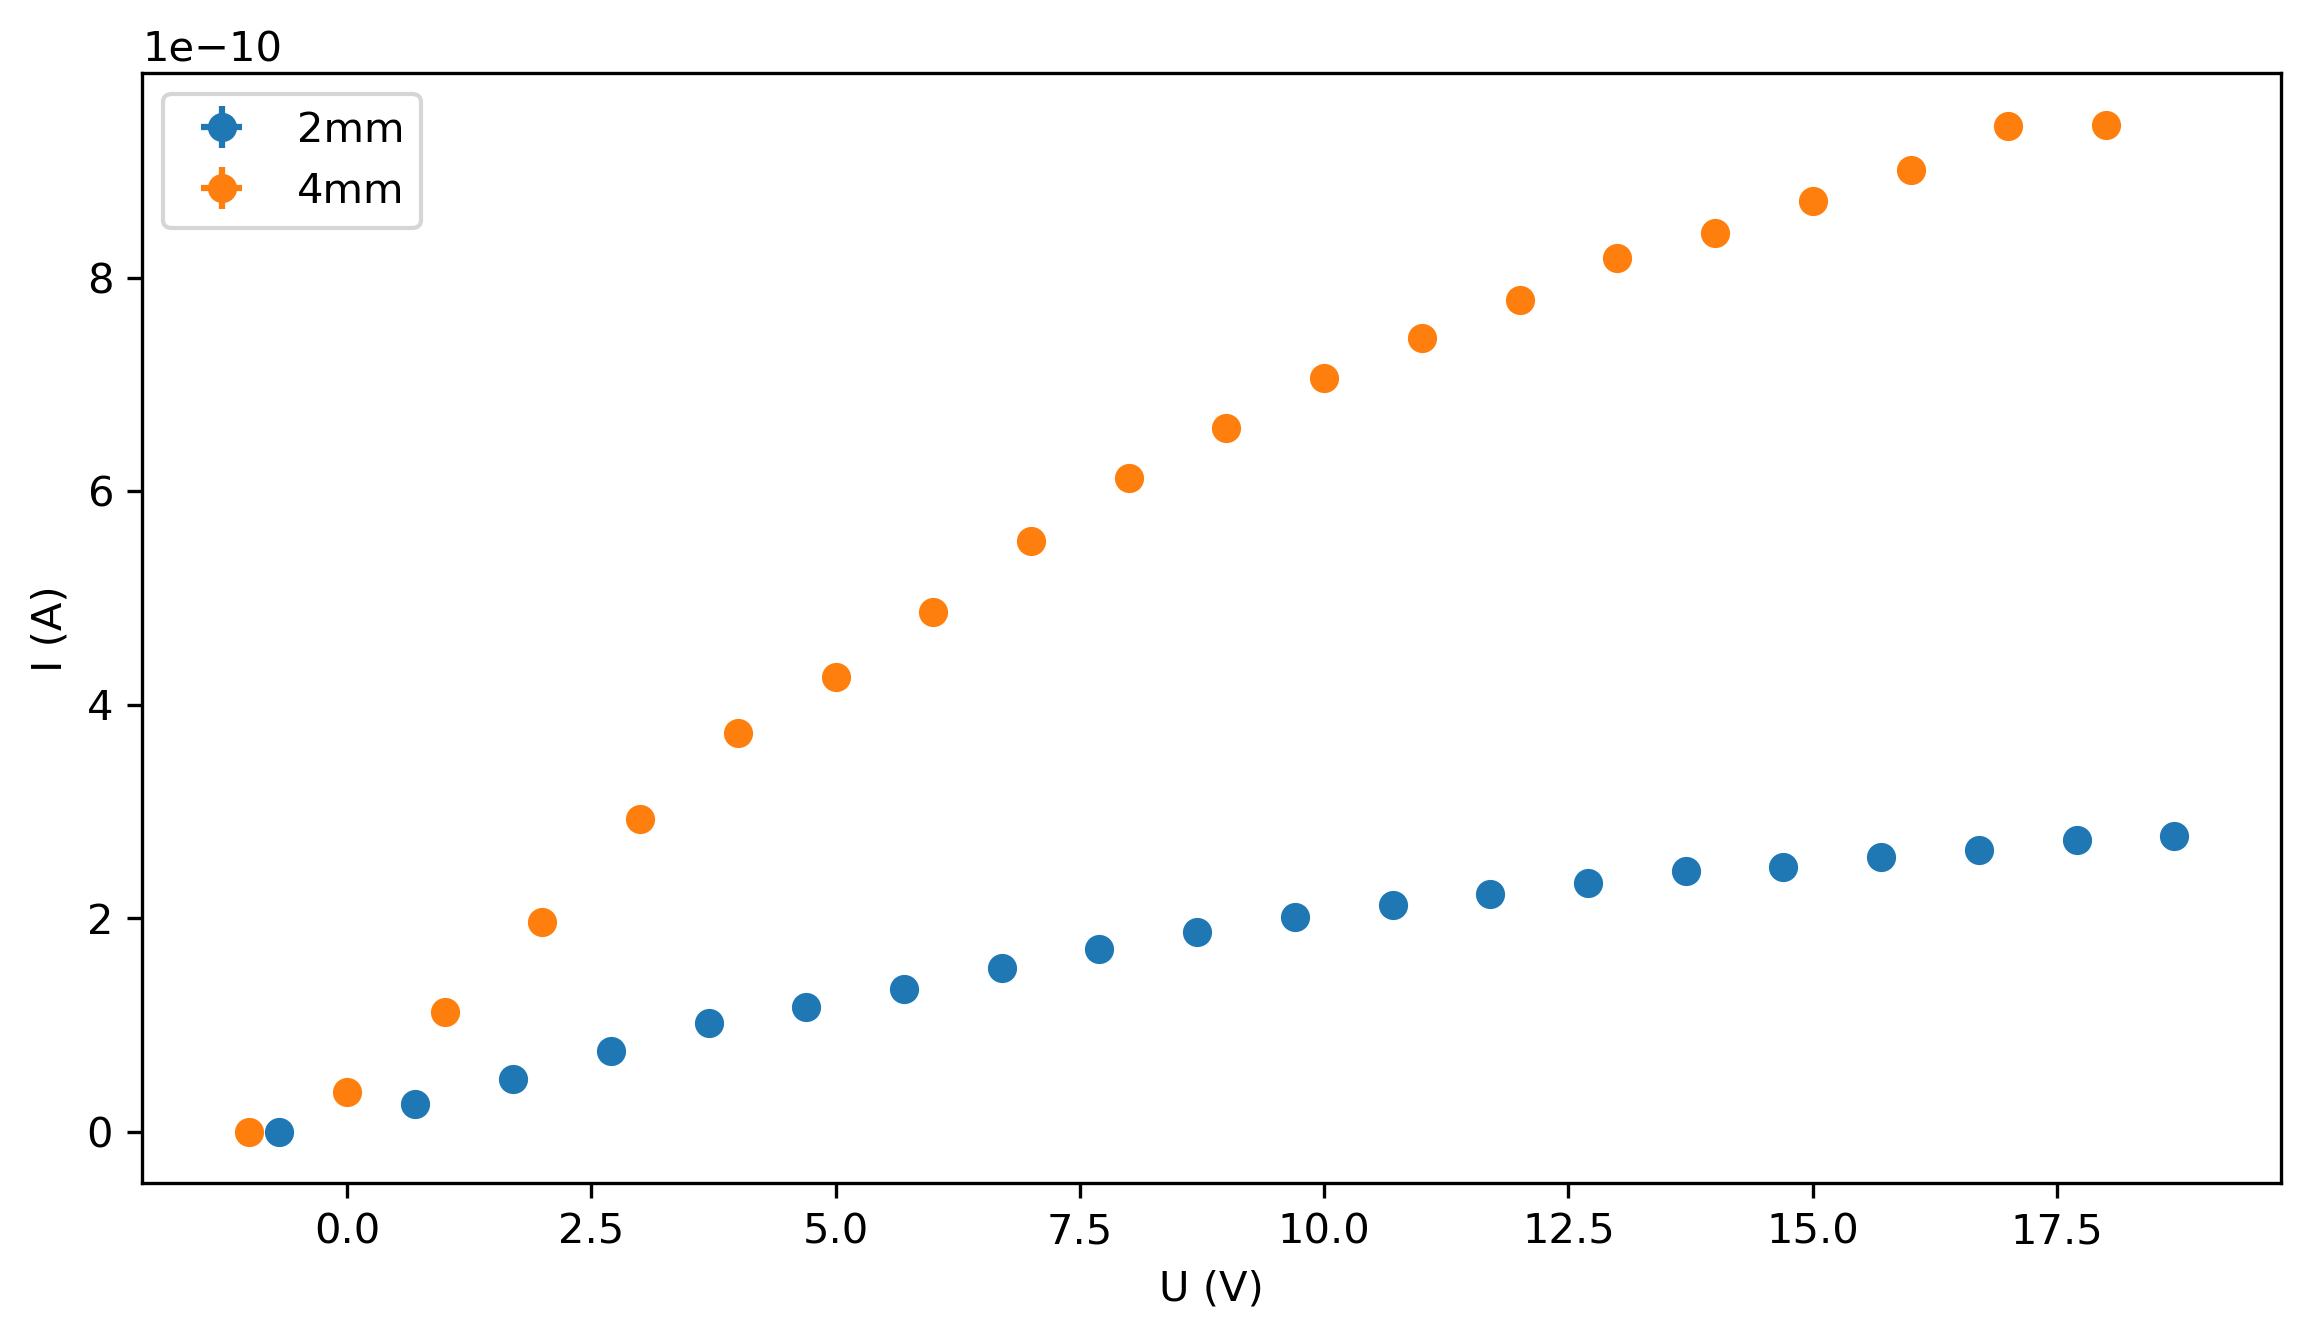

In [22]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(v_2,i_2,sigma_I24,sigma_V, 'o', label = '2mm')
plt.errorbar(v_4,i_4,sigma_I24,sigma_V, 'o', label = '4mm')
#plt.errorbar(v_8,i_8,sigma_I8,sigma_V, 'o-', label = '8mm')
#plt.axvspan(3.55 , 4.15 , color='gray', alpha=0.15, lw=0)
plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
plt.legend()
plt.show()

## Fit polinomial dos dados

Aqui utilizaremos um polinômio de quinto grau.

In [23]:
#Fit polinomial através da função polyfit do numpy:
grau = 5
coefs_2mm = np.polyfit(v_2,i_2,grau)
coefs_4mm = np.polyfit(v_4,i_4,grau)
coefs_8mm = np.polyfit(v_8,i_8,grau)

print('coefs_2mm: ',coefs_2mm)
print('coefs_4mm: ',coefs_4mm)
print('coefs_8mm: ',coefs_8mm)


coefs_2mm:  [-1.49478437e-16  8.63039870e-15 -1.68787579e-13  7.12893258e-13
  2.16579705e-11  1.33156026e-11]
coefs_4mm:  [-1.86493247e-15  8.93091213e-14 -1.48663920e-12  7.88475648e-12
  6.45700172e-11  4.76189099e-11]
coefs_8mm:  [-5.50556378e-15  2.67781768e-13 -4.44937943e-12  1.99123722e-11
  2.97241862e-10  2.34044768e-10]


## Plot dos dados com o fit

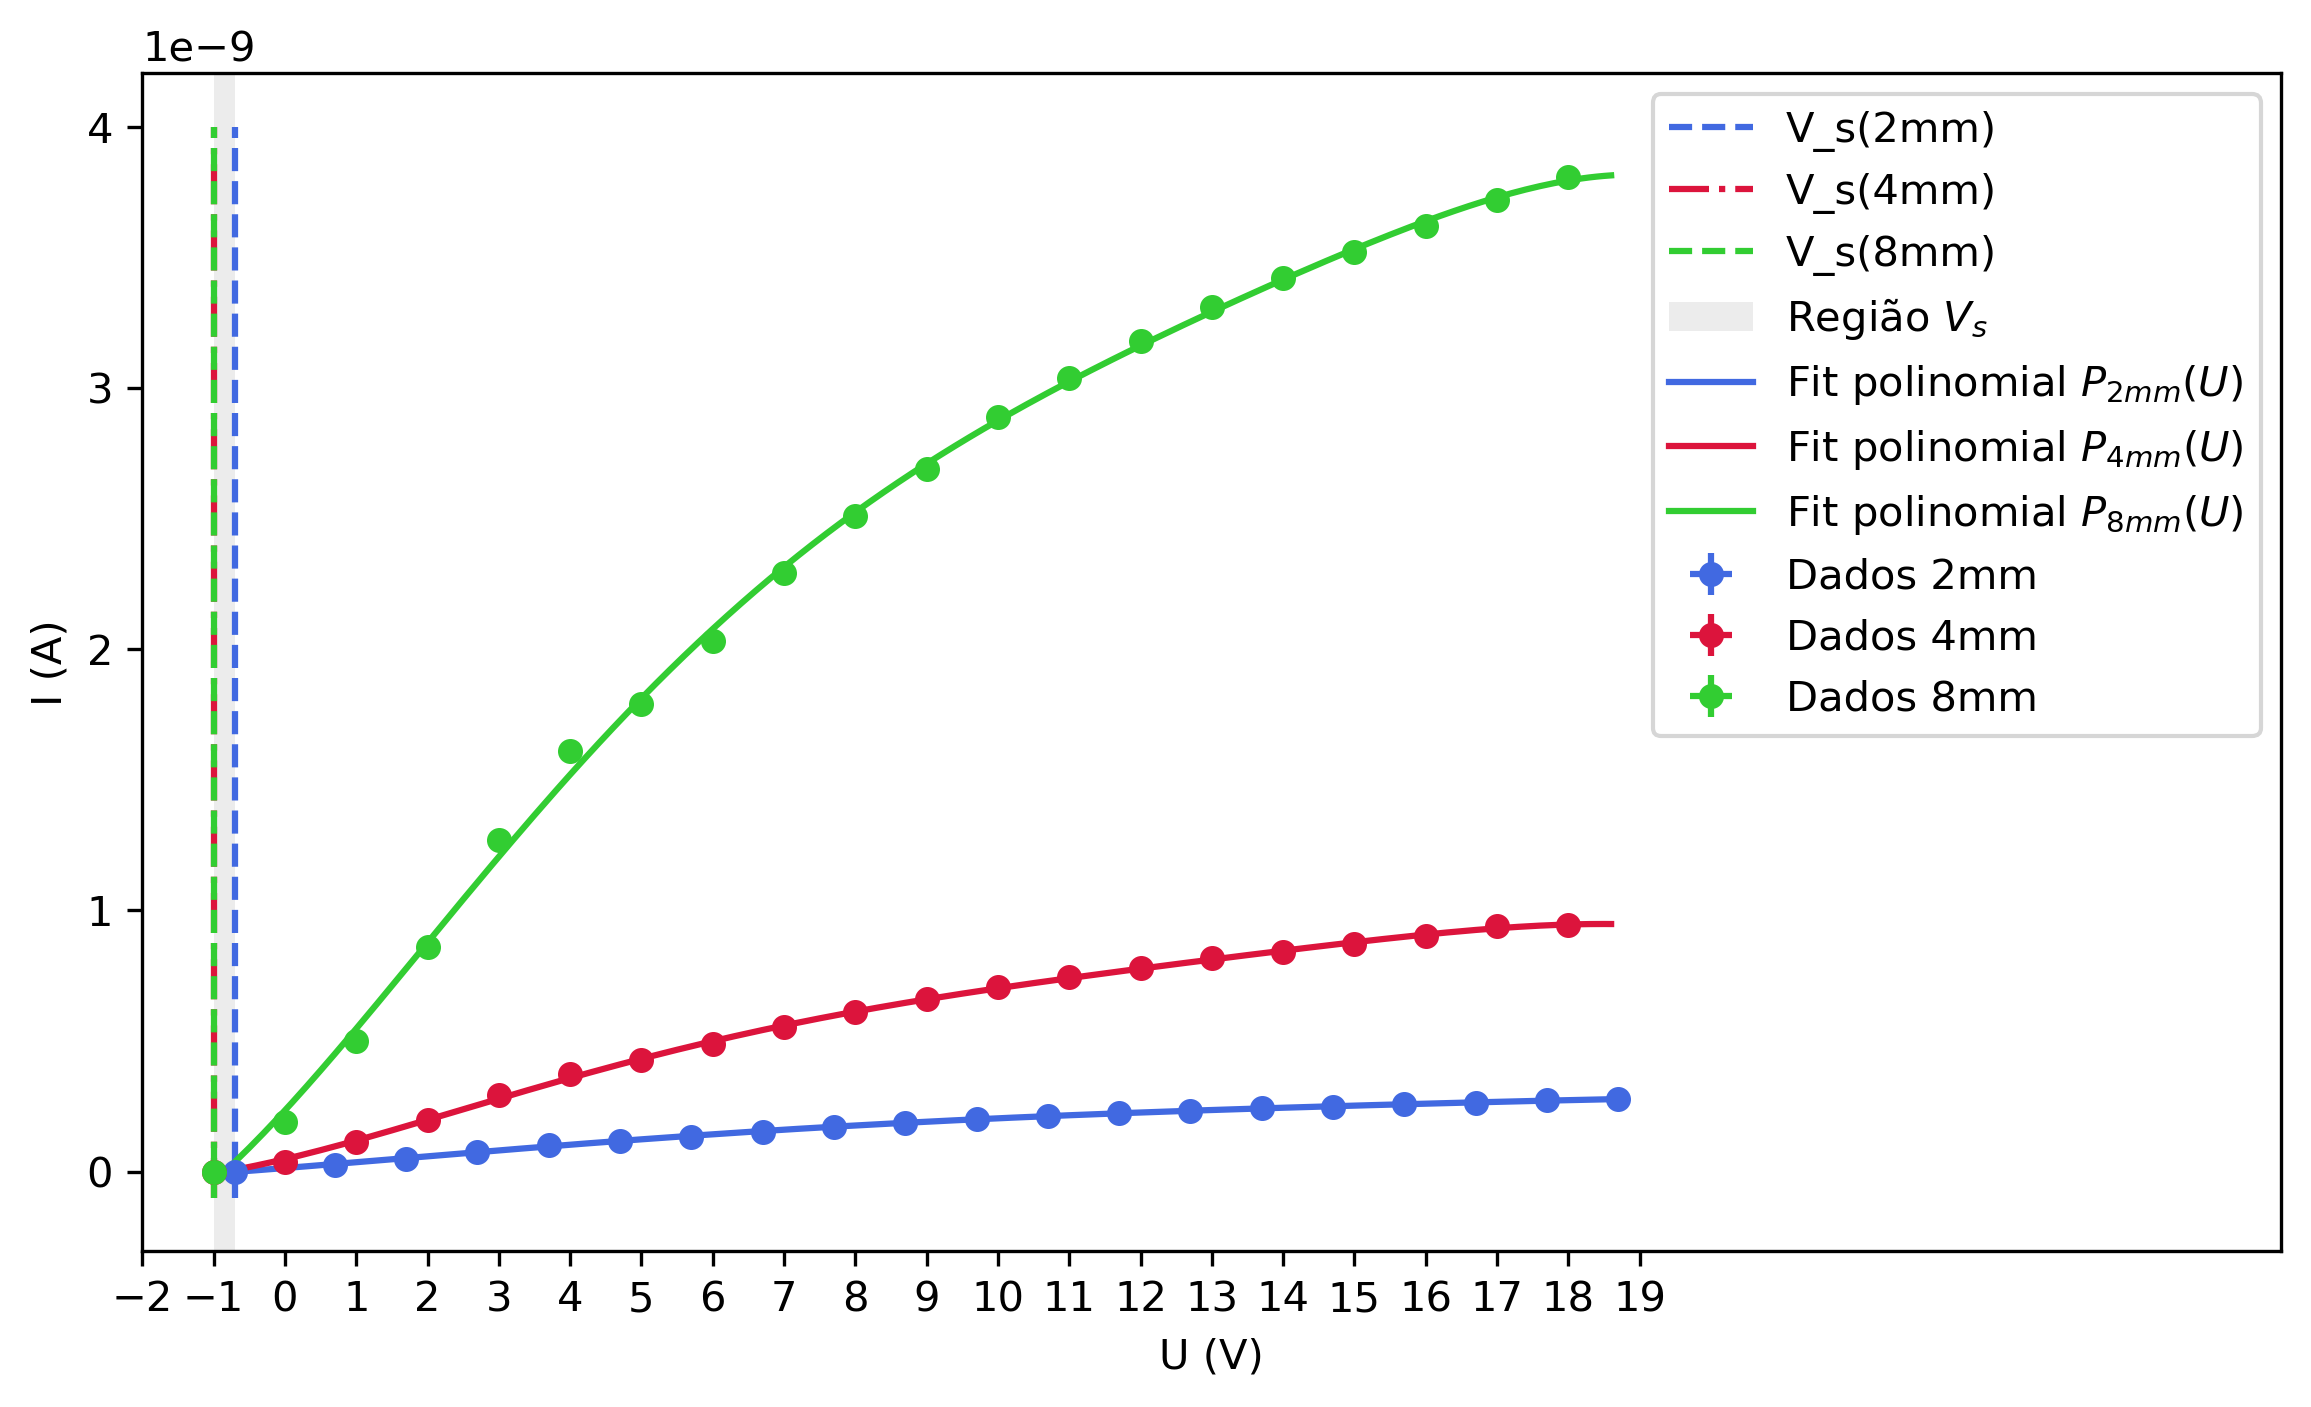

In [24]:
plt.figure(figsize = [9.2,5.2], dpi = 300)

#Plot dos dados
plt.errorbar(v_2,i_2,sigma_I24,sigma_V, 'o',ms = 5, label = 'Dados 2mm', color = 'royalblue')
plt.errorbar(v_4,i_4,sigma_I24,sigma_V, 'o',ms = 5, label = 'Dados 4mm', color = 'crimson')
plt.errorbar(v_8,i_8,sigma_I8,sigma_V, 'o',ms = 5, label = 'Dados 8mm', color = 'limegreen')

#Plot dos potenciais de parada
plt.plot([-0.7,-0.7],[-0.1e-9,4e-9], ls = '--', color =  'royalblue', label = r'V_s(2mm)')
plt.plot([-1,-1],[-0.1e-9,4e-9], ls = '-.', color =  'crimson', label = r'V_s(4mm)')
plt.plot([-1,-1],[-0.1e-9,4e-9], ls = '--', color =  'limegreen', label = r'V_s(8mm)')
plt.axvspan(-1 , -0.7 , color='gray', alpha=0.15, lw=0, label = r'Região $V_s$')

#Plot dos fits
x_2 = np.arange(-1, 18.7, 0.1)
plt.plot(x_2, p(x_2,coefs_2mm), label = 'Fit polinomial $P_{2mm}(U)$', color = 'royalblue')
plt.plot(x_2, p(x_2,coefs_4mm), label = 'Fit polinomial $P_{4mm}(U)$', color = 'crimson')
plt.plot(x_2, p(x_2,coefs_8mm), label = 'Fit polinomial $P_{8mm}(U)$', color = 'limegreen')

#Labels e etc...
plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim([-2,28])
plt.xticks(np.arange(-2,20,1))
plt.legend()
plt.show()


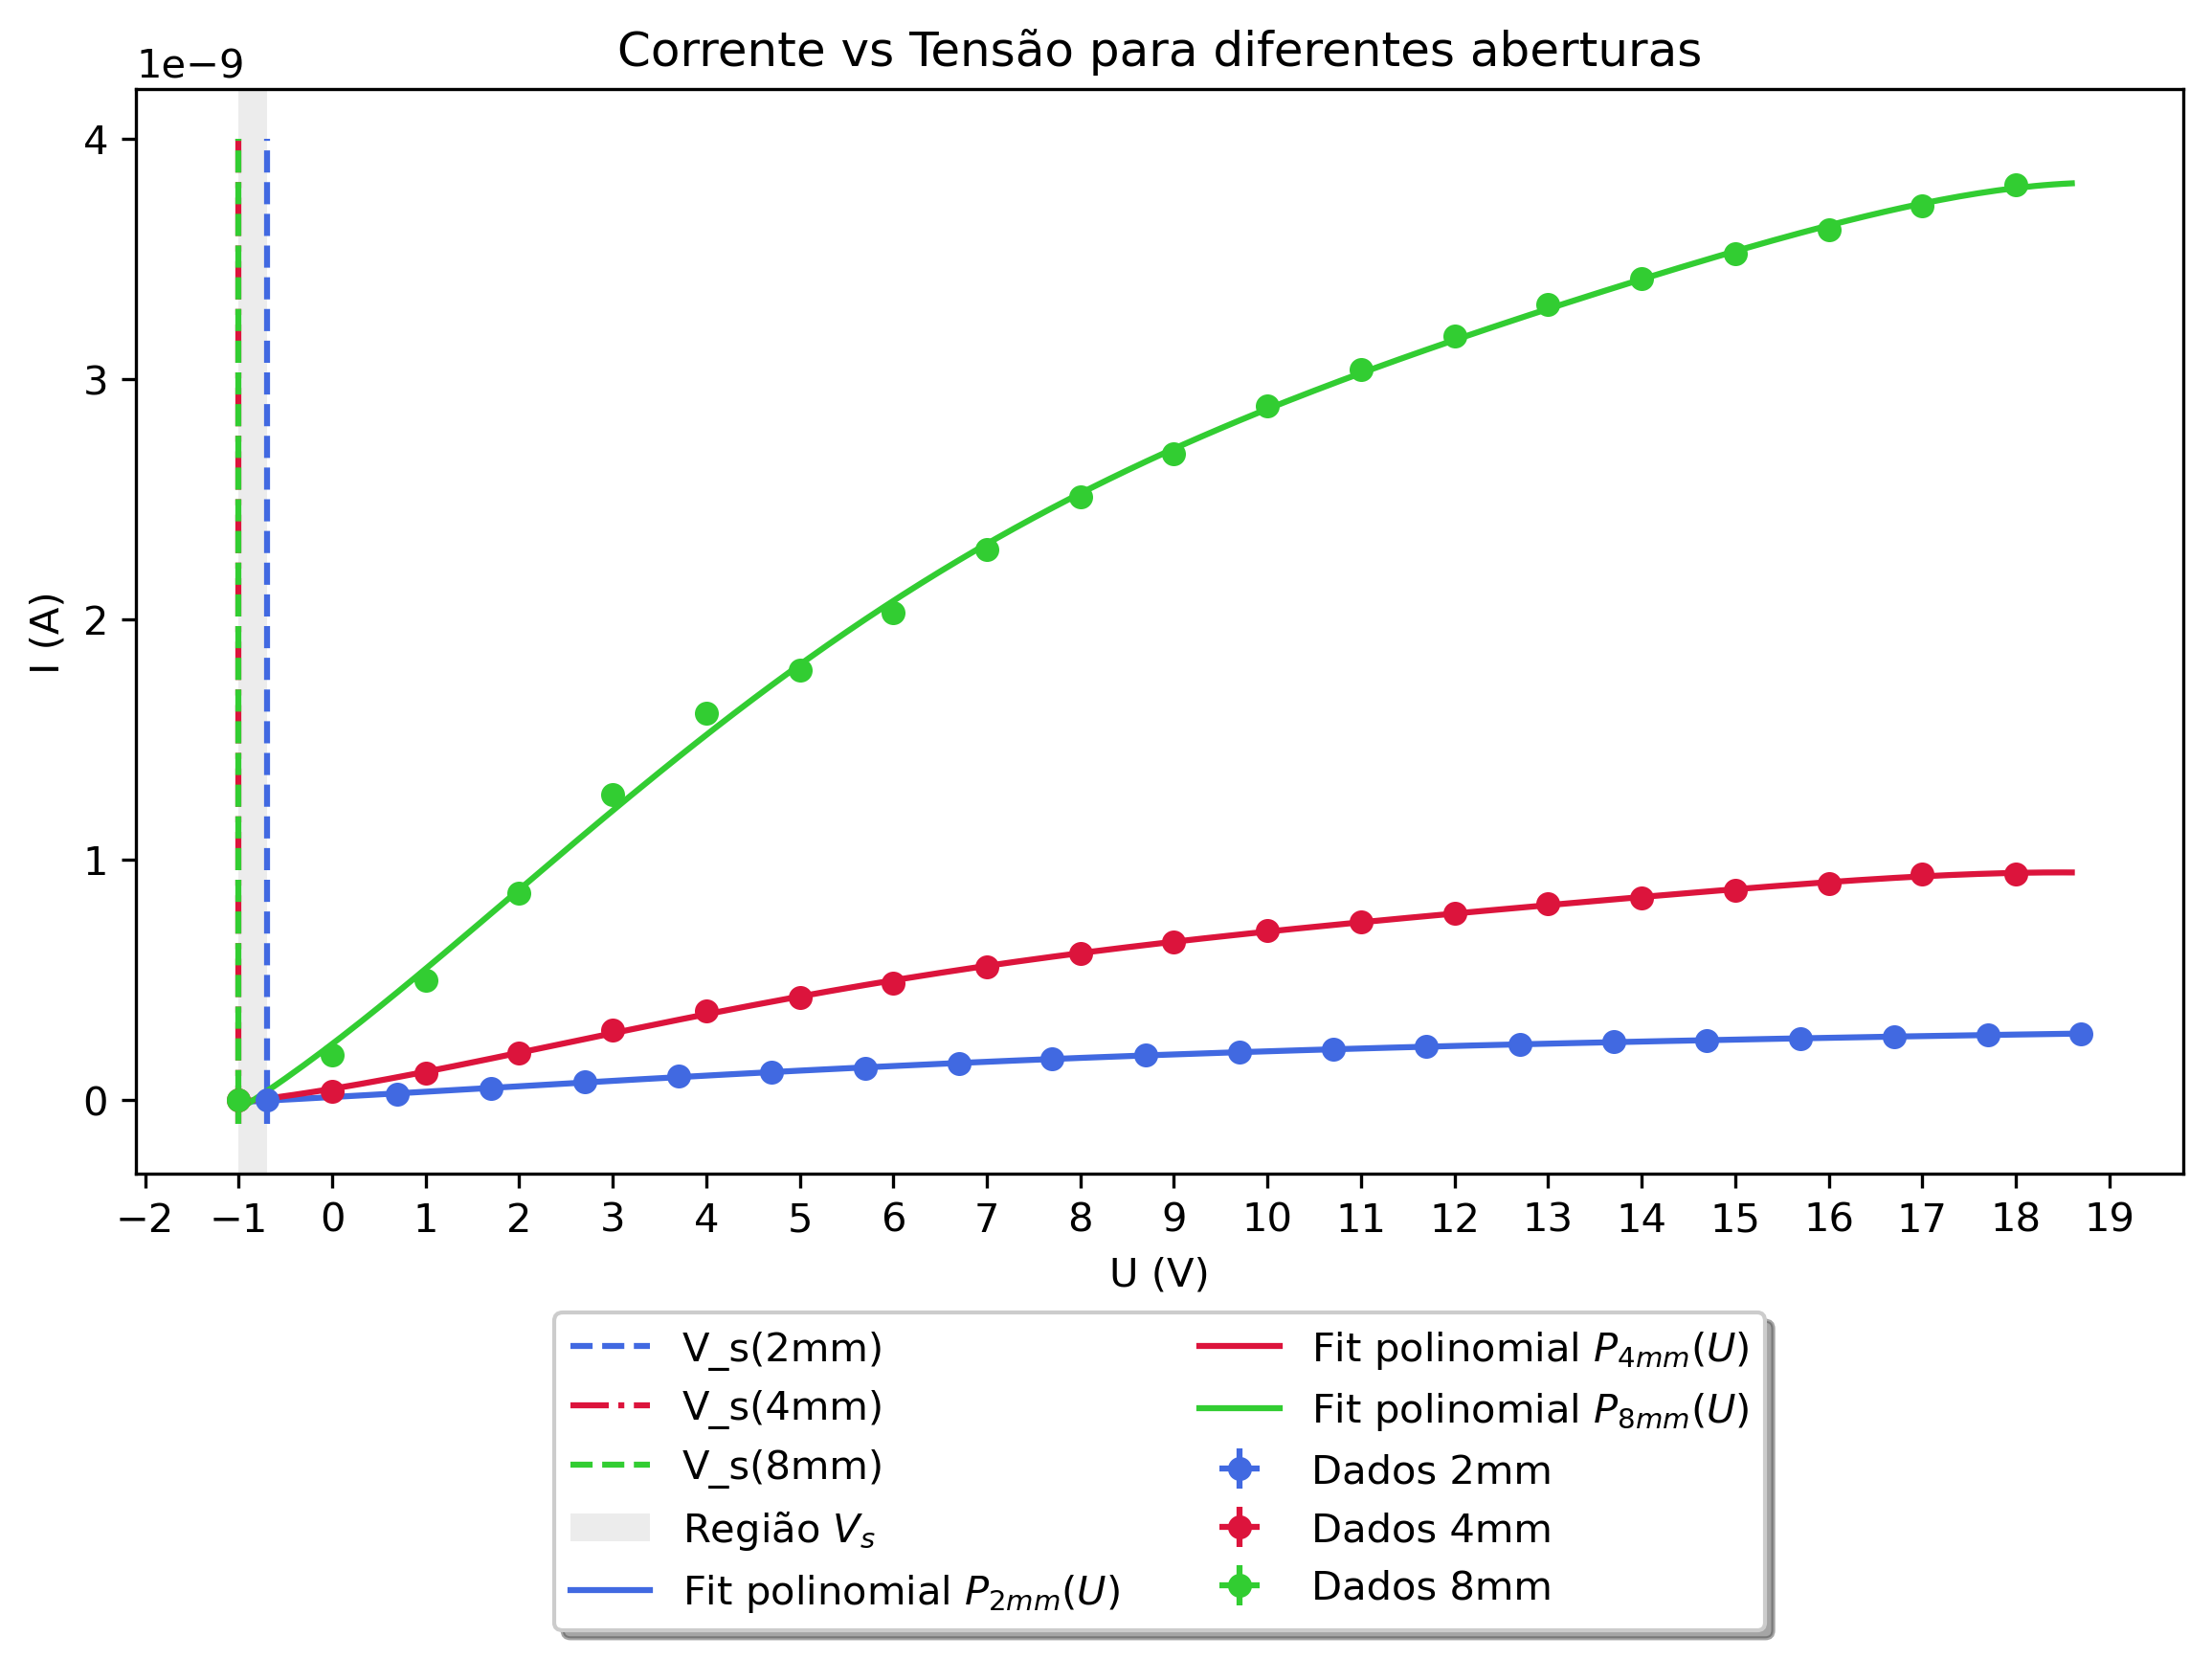

In [43]:
plt.figure(figsize = [9.2,5.0], dpi = 300)
ax = plt.subplot(111)
#Plot dos dados
ax.errorbar(v_2,i_2,sigma_I24,sigma_V, 'o',ms = 5, label = 'Dados 2mm', color = 'royalblue')
ax.errorbar(v_4,i_4,sigma_I24,sigma_V, 'o',ms = 5, label = 'Dados 4mm', color = 'crimson')
ax.errorbar(v_8,i_8,sigma_I8,sigma_V, 'o',ms = 5, label = 'Dados 8mm', color = 'limegreen')

#Plot dos potenciais de parada
ax.plot([-0.7,-0.7],[-0.1e-9,4e-9], ls = '--', color =  'royalblue', label = r'V_s(2mm)')
ax.plot([-1,-1],[-0.1e-9,4e-9], ls = '-.', color =  'crimson', label = r'V_s(4mm)')
ax.plot([-1,-1],[-0.1e-9,4e-9], ls = '--', color =  'limegreen', label = r'V_s(8mm)')
ax.axvspan(-1 , -0.7 , color='gray', alpha=0.15, lw=0, label = r'Região $V_s$')

#Plot dos fits
x_2 = np.arange(-1, 18.7, 0.1)
ax.plot(x_2, p(x_2,coefs_2mm), label = 'Fit polinomial $P_{2mm}(U)$', color = 'royalblue')
ax.plot(x_2, p(x_2,coefs_4mm), label = 'Fit polinomial $P_{4mm}(U)$', color = 'crimson')
ax.plot(x_2, p(x_2,coefs_8mm), label = 'Fit polinomial $P_{8mm}(U)$', color = 'limegreen')

#Labels e etc...
plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim([-2,28])
plt.xticks(np.arange(-2,20,1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), shadow=True, ncol=2)
plt.title('Corrente vs Tensão para diferentes aberturas')
plt.savefig('Graphs/photoelectric/P2_IxV.pdf')
plt.show()

## Testes (ignorar)

In [26]:
def f0(x,a,b):
    return np.sqrt(a* x + b)

In [27]:
def g(x,a,b, c):
    return a * np.log(x*b) + c

In [28]:
popt4, pcov = curve_fit(f0, v_8[1:], i_8[1:])
print(popt4)

[7.88410129e-19 9.13648272e-21]


C:\Users\Vinic\AppData\Local\Temp\ipykernel_16924\3521764020.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a* x + b)


In [29]:

popt2, pcov2 = curve_fit(g, v_8[5:], i_8[5:])
x_2 = np.arange(-1, 4.1,0.1)
x_3 = np.arange(4.1,19,0.1)
x_4 = np.arange(-1,18,0.1)


In [30]:
coefs = np.polyfit(v_8,i_8,5)
print(coefs, len(coefs))

[-5.50556378e-15  2.67781768e-13 -4.44937943e-12  1.99123722e-11
  2.97241862e-10  2.34044768e-10] 6


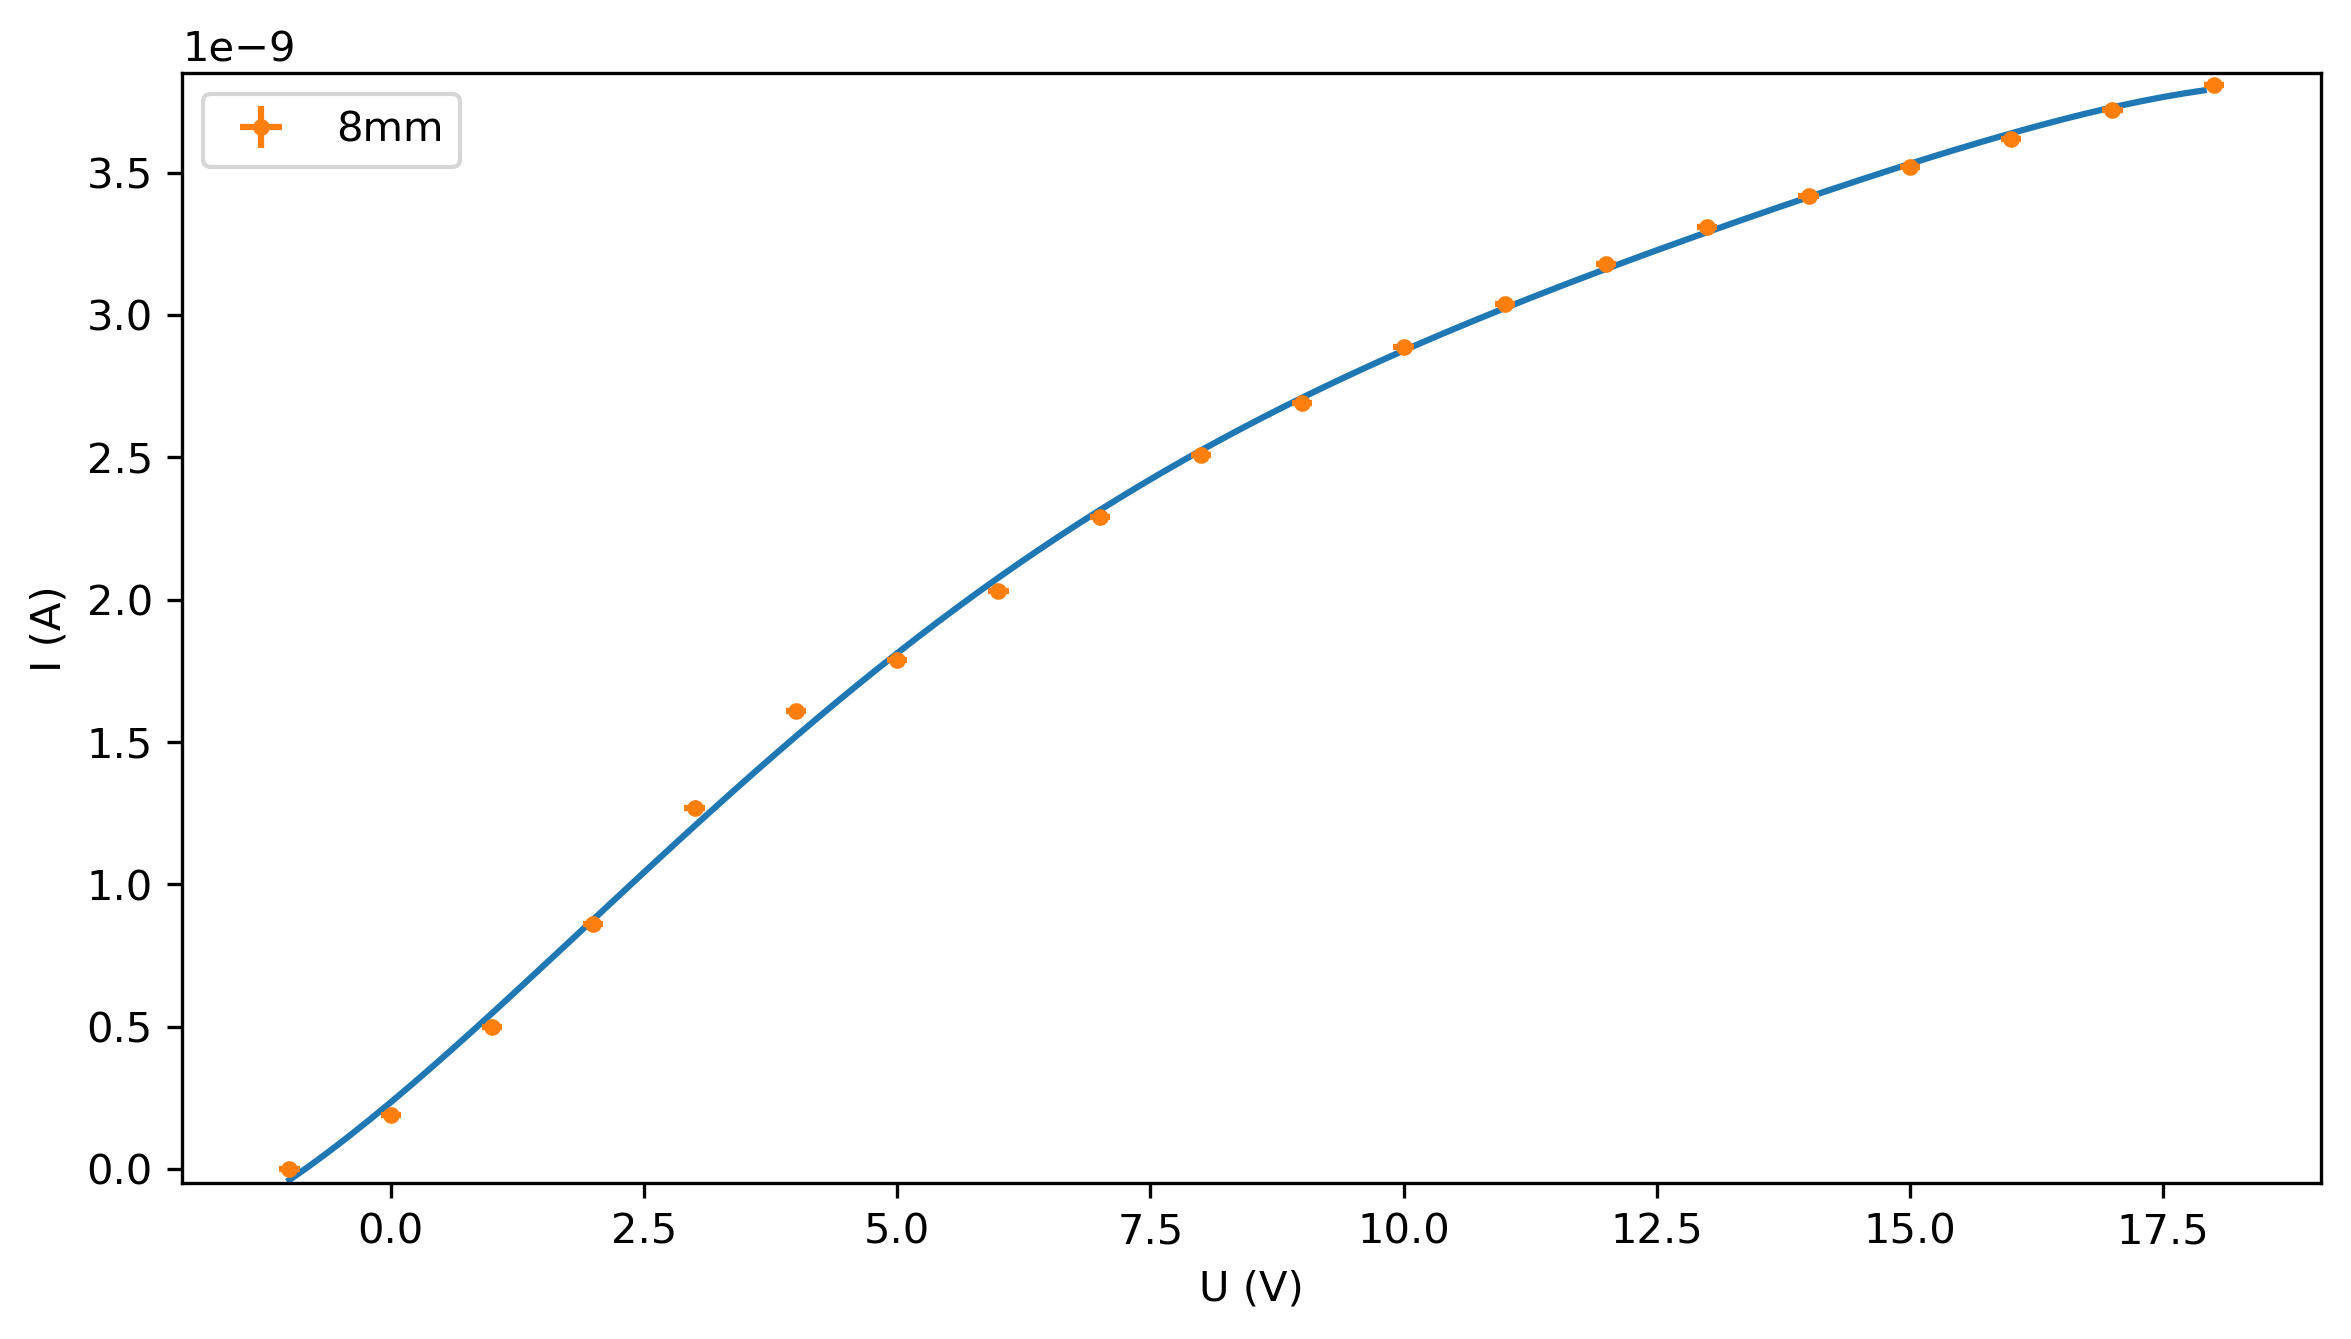

In [31]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
#plt.plot(x_2,f(x_2,popt[0], popt[1]))
#plt.plot(x_3,g(x_3,popt2[0], popt2[1], popt2[2] ))
#plt.plot(x_4,f0(x_4,popt4[0], popt4[1], popt4[2], popt4[3] ))
#plt.plot(x_4,f0(x_4,popt4[0], popt4[1] ))
plt.plot(x_4,p(x_4, coefs))
plt.errorbar(v_8,i_8,sigma_I8,sigma_V, 'o',ms = 3, label = '8mm')


plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
#plt.xscale('log')
#plt.yscale('log')
plt.ylim([-0.5e-10,38.5e-10])
plt.legend()
plt.show()

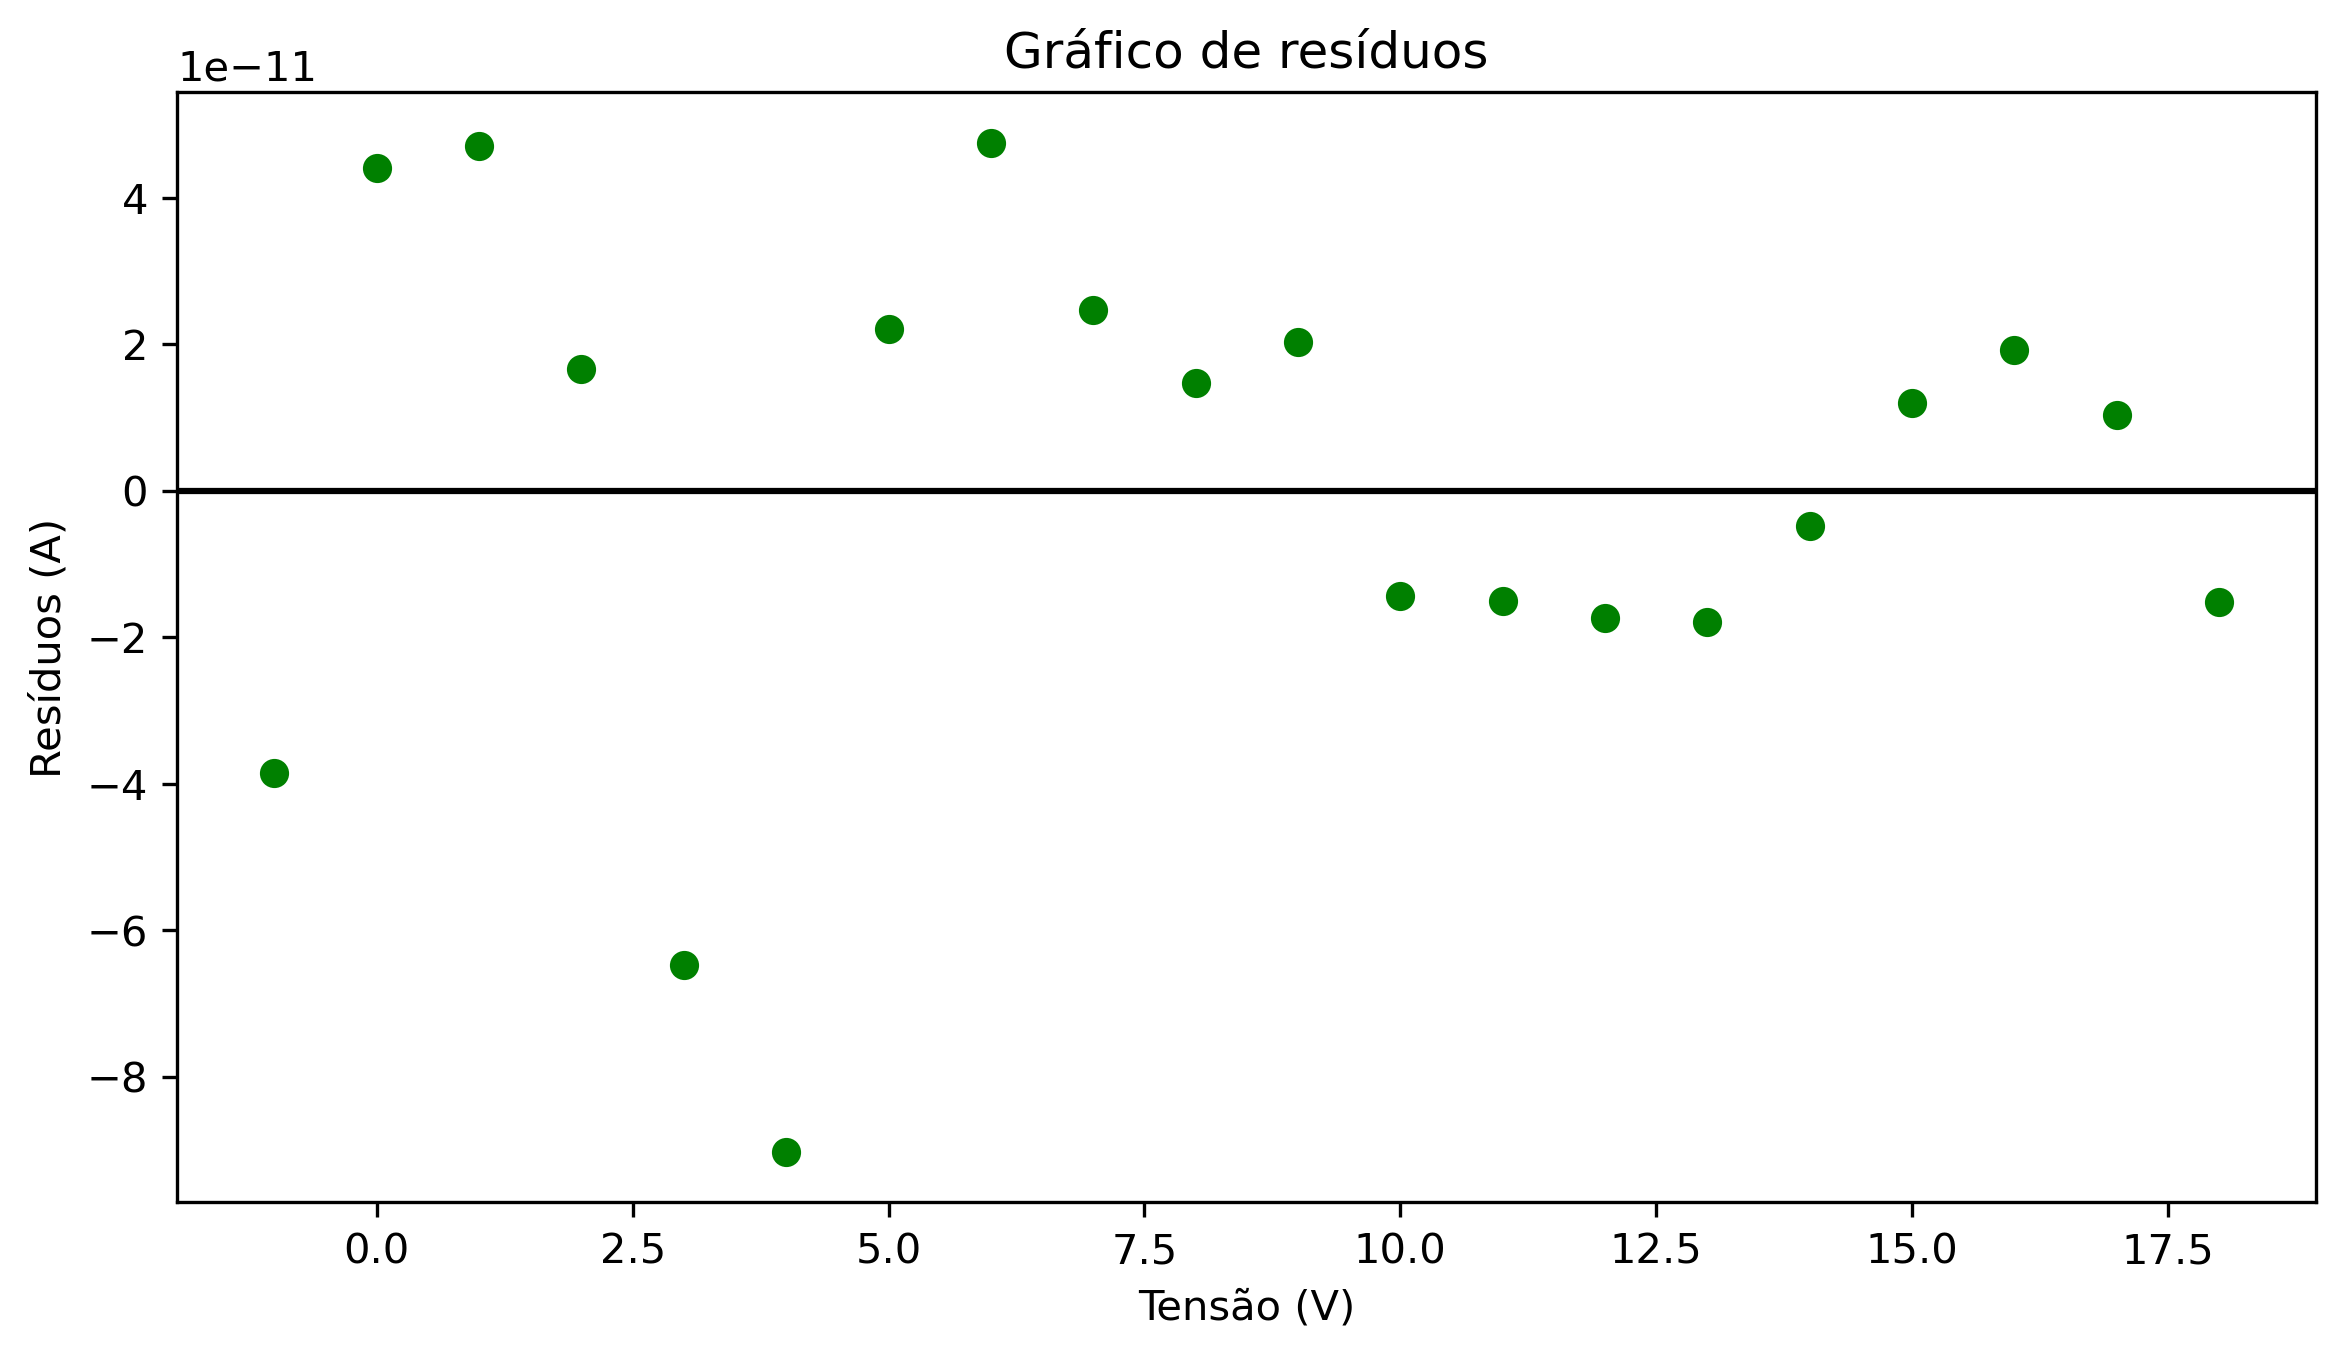

In [32]:
#Parte 1, variando a tensão para as placas distância fixa de 10cm:

plt.figure(figsize = [9.2,4.9], dpi = 300) 
resid = (p(v_8,coefs) - i_8)
plt.plot(v_8, resid, 'og')
plt.title("Gráfico de resíduos")
plt.xlabel("Tensão (V)")
plt.ylabel("Resíduos (A)")
plt.axhline(y=0, color='k', linestyle='-')
plt.show()

## Aqui pode parar de ignorar

# Terceira parte

## Dados obtidos


In [33]:
#Tensão(436nm)
v_436 = np.array(np.arange(-0.9,18.2,1)) #V
#Corrente(436nm)
i_436 = np.array([0,4.4, 11.5, 21.1, 27.9, 38.9, 39.2, 48.7, 55.3, 60.5, 66.2, 70.5,
                  74.3, 77.8, 81.5, 83.9, 86.4, 89.2, 93.8, 93.2]) * 1e-11 #A

#Tensão(546nm)
v_546 = np.array(np.arange(-0.5,18.6,1)) #V
#Corrente(546nm)
i_546 = np.array([0, 1.8, 4.5, 6.6, 8.7, 10.3, 11.3, 12.7, 13.9, 14.9, 15.6, 16.3, 16.9,
                  17.6, 18, 18.4, 18.8, 19.2, 19.6, 19.8]) * 1e-11 #A

#Tensão(577nm)
v_577 = np.array(np.arange(-0.2, 18.9, 1))
#Corrente(577nm)
i_577 = np.array([0, 0.4, 0.9, 1.4, 1.7, 2, 2.2, 2.4, 2.6, 2.8, 2.9, 3.0, 3.1, 3.1, 3.2, 3.3, 3.4, 3.4, 3.5, 3.6]) *1e-11

print(i_577)
#Incertezas

sigma_V = sigma_V #Igual da parte 2

sigma_I = np.full(len(v_577), 0.1e-11)


[0.0e+00 4.0e-12 9.0e-12 1.4e-11 1.7e-11 2.0e-11 2.2e-11 2.4e-11 2.6e-11
 2.8e-11 2.9e-11 3.0e-11 3.1e-11 3.1e-11 3.2e-11 3.3e-11 3.4e-11 3.4e-11
 3.5e-11 3.6e-11]


In [34]:
print(v_436)

[-0.9  0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1
 13.1 14.1 15.1 16.1 17.1 18.1]


## Fit polinomial dos dados

Aqui utilizaremos um polinômio de quinto grau para fazer o fit

In [35]:
#Fit polinomial através da função polyfit do numpy:
grau = 5
coefs_436 = np.polyfit(v_436,i_436,grau)
coefs_546 = np.polyfit(v_546,i_546,grau)
coefs_577 = np.polyfit(v_577,i_577,grau)

print('coefs_436: ',coefs_436)
print('coefs_546: ',coefs_546)
print('coefs_577: ',coefs_577)

coefs_436:  [-1.06272715e-15  5.46974949e-14 -9.93326617e-13  5.45282053e-12
  6.56812062e-11  4.72664813e-11]
coefs_546:  [-1.62774263e-16  7.26410270e-15 -8.60443180e-14 -6.19791885e-13
  2.41345023e-11  1.01666367e-11]
coefs_577:  [-1.45600574e-17  6.49126886e-16 -2.32981028e-15 -2.68972812e-13
  5.25965153e-12  6.83381000e-13]


## Plot dos dados e com o fit

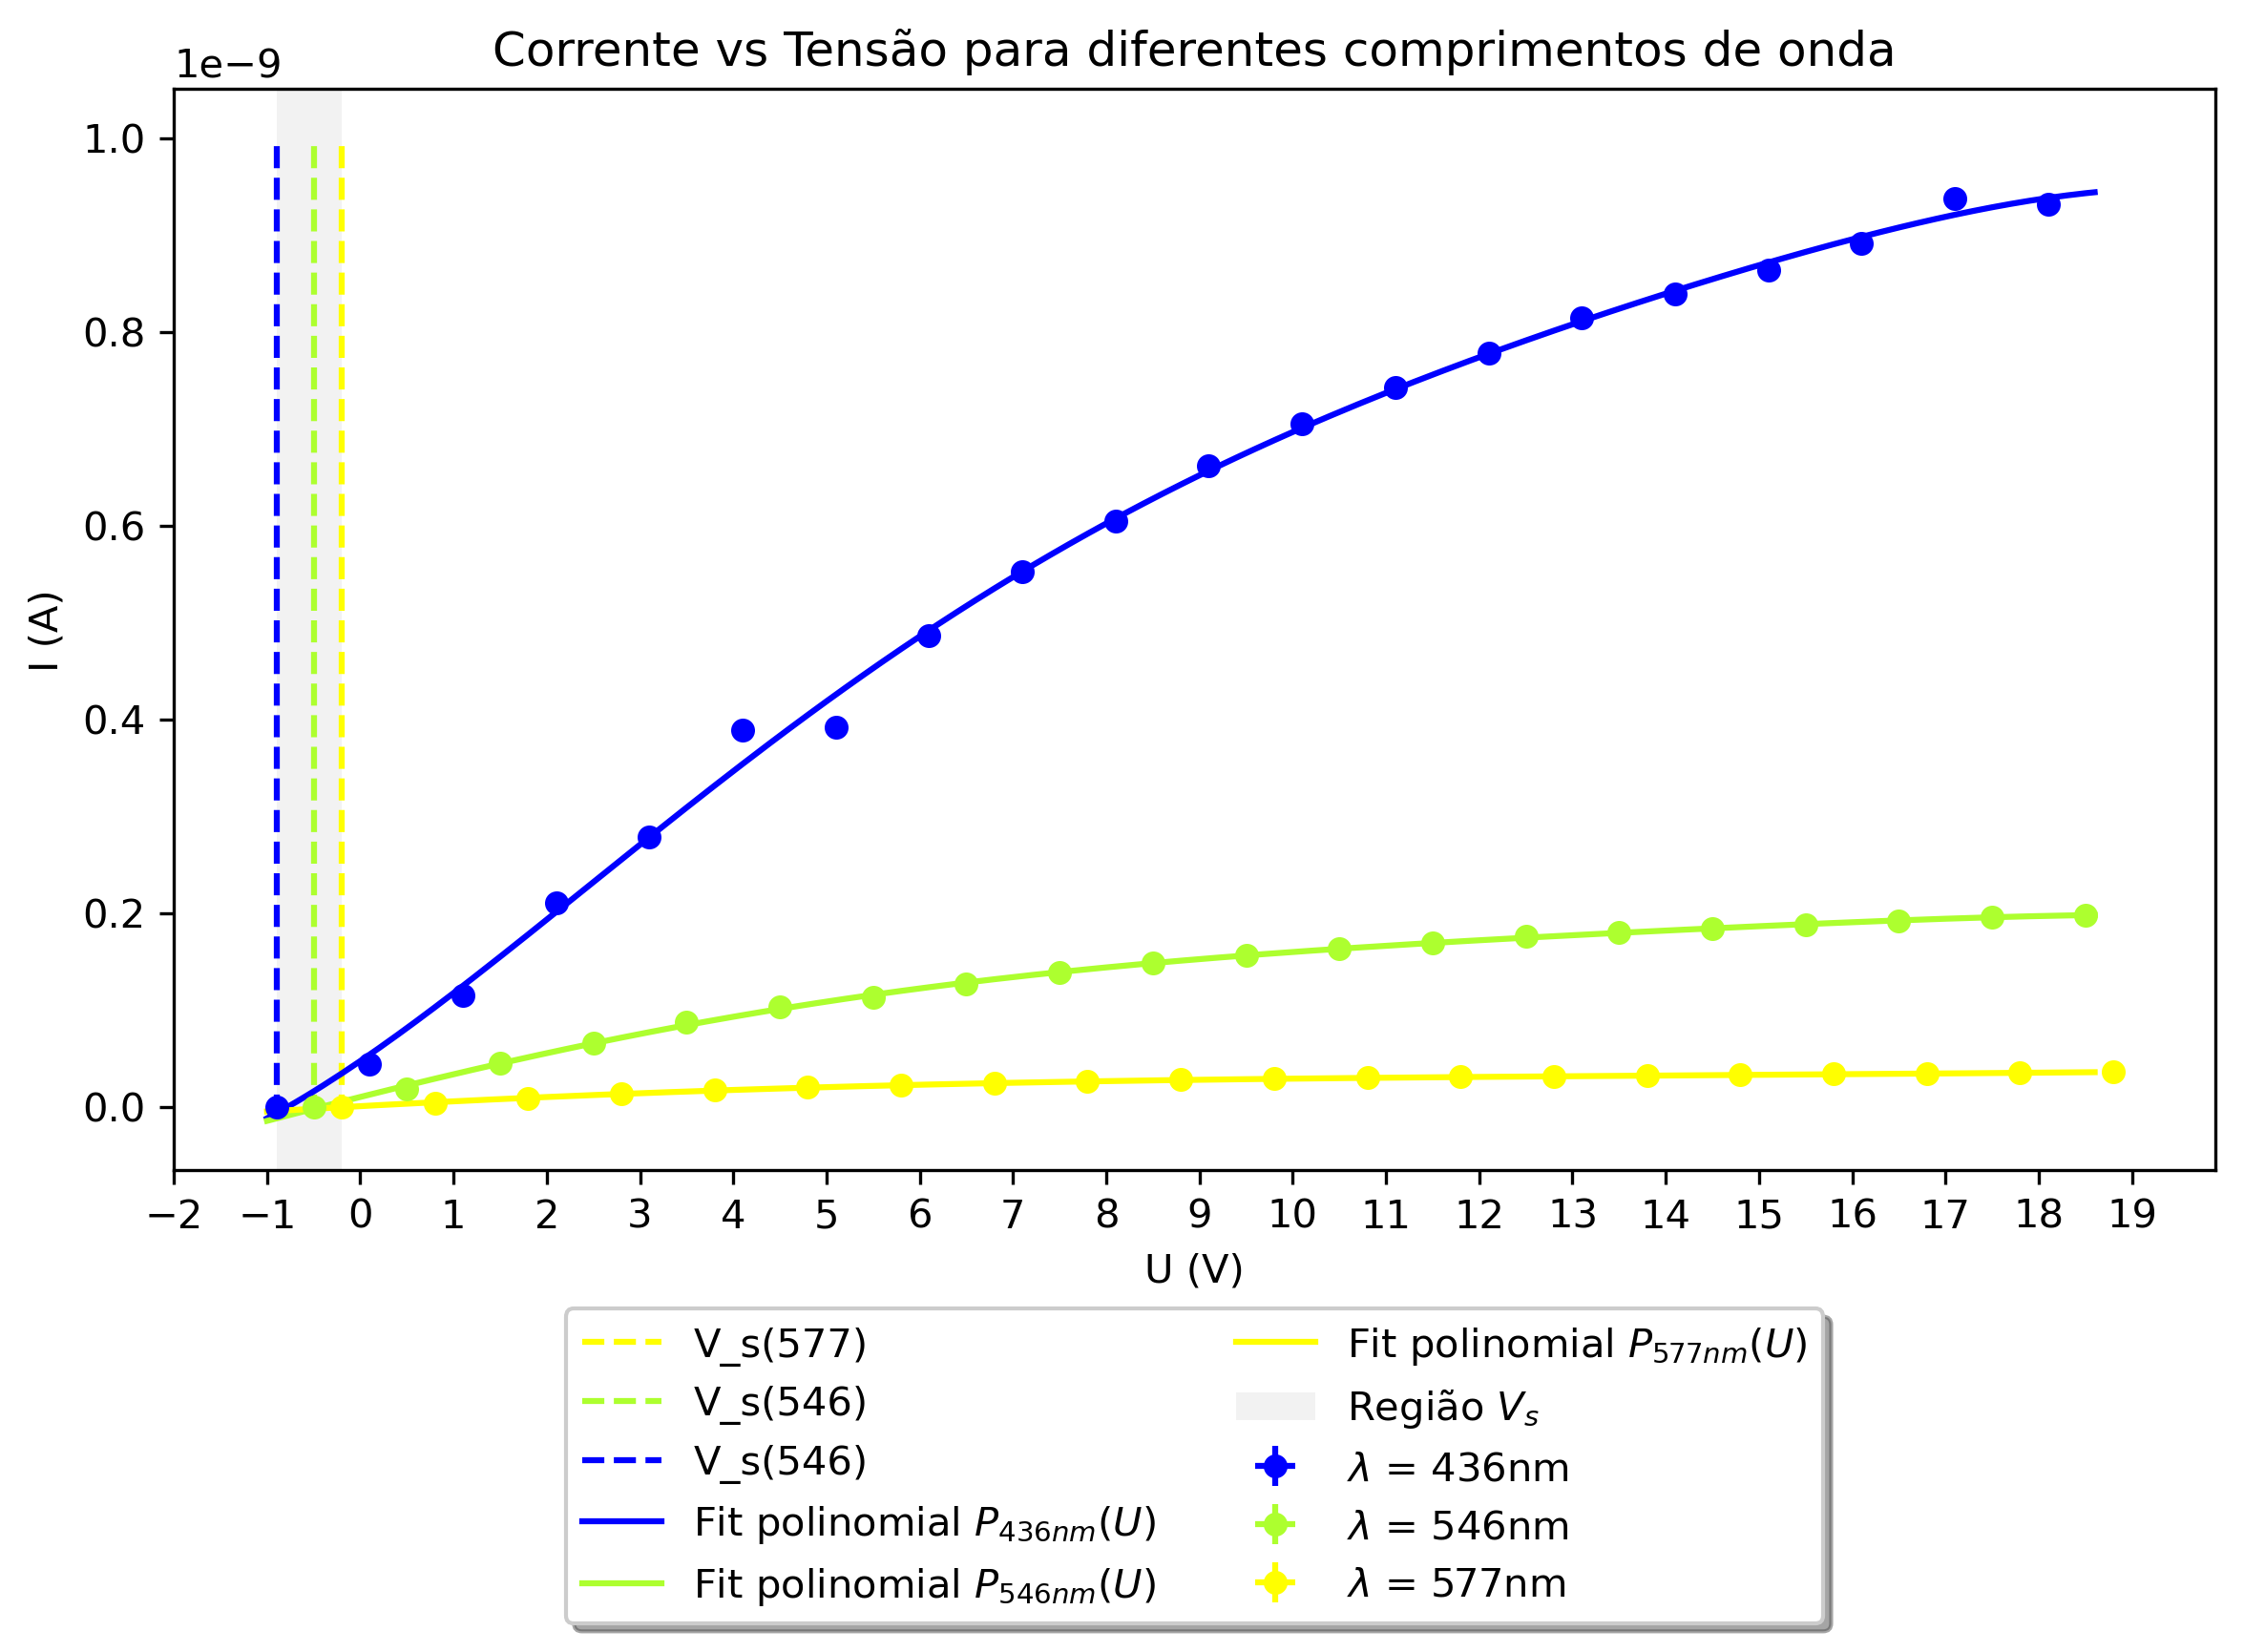

In [44]:
plt.figure(figsize = [9.2,5.0], dpi = 300)
ax = plt.subplot(111)
#Plot dos dados
ax.errorbar(v_436,i_436,sigma_I,sigma_V, 'o', ms = 5, color = 'blue', label = r'$\lambda$ = 436nm')
ax.errorbar(v_546,i_546,sigma_I,sigma_V, 'o', ms = 5, color = 'greenyellow', label = r'$\lambda$ = 546nm')
ax.errorbar(v_577,i_577,sigma_I,sigma_V, 'o', ms = 5,  color = 'yellow', label = r'$\lambda$ = 577nm')

#Plot dos potenciais de parada
ax.plot([-0.2,-0.2],[-0.1e-10,10e-10], ls = '--', color =  'yellow', label = r'V_s(577)')
ax.plot([-0.5,-0.5],[-0.1e-10,10e-10], ls = '--', color =  'greenyellow', label = r'V_s(546)')
ax.plot([-0.9,-0.9],[-0.1e-10,10e-10], ls = '--', color =  'blue', label = r'V_s(546)')



#Plot dos fits
x_2 = np.arange(-1, 18.7, 0.1)
ax.plot(x_2, p(x_2,coefs_436), label = 'Fit polinomial $P_{436nm}(U)$', color = 'blue')
ax.plot(x_2, p(x_2,coefs_546), label = 'Fit polinomial $P_{546nm}(U)$', color = 'greenyellow')
ax.plot(x_2, p(x_2,coefs_577), label = 'Fit polinomial $P_{577nm}(U)$', color = 'yellow')
ax.axvspan(-0.9 , -0.2 , color='gray', alpha=0.1, lw=0, label = r'Região $V_s$')

#Labels e etc...
plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim([-2,28])
plt.xticks(np.arange(-2,20,1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), shadow=True, ncol=2)
plt.title('Corrente vs Tensão para diferentes comprimentos de onda')
plt.savefig('Graphs/photoelectric/P3_IxV.pdf')
plt.show()

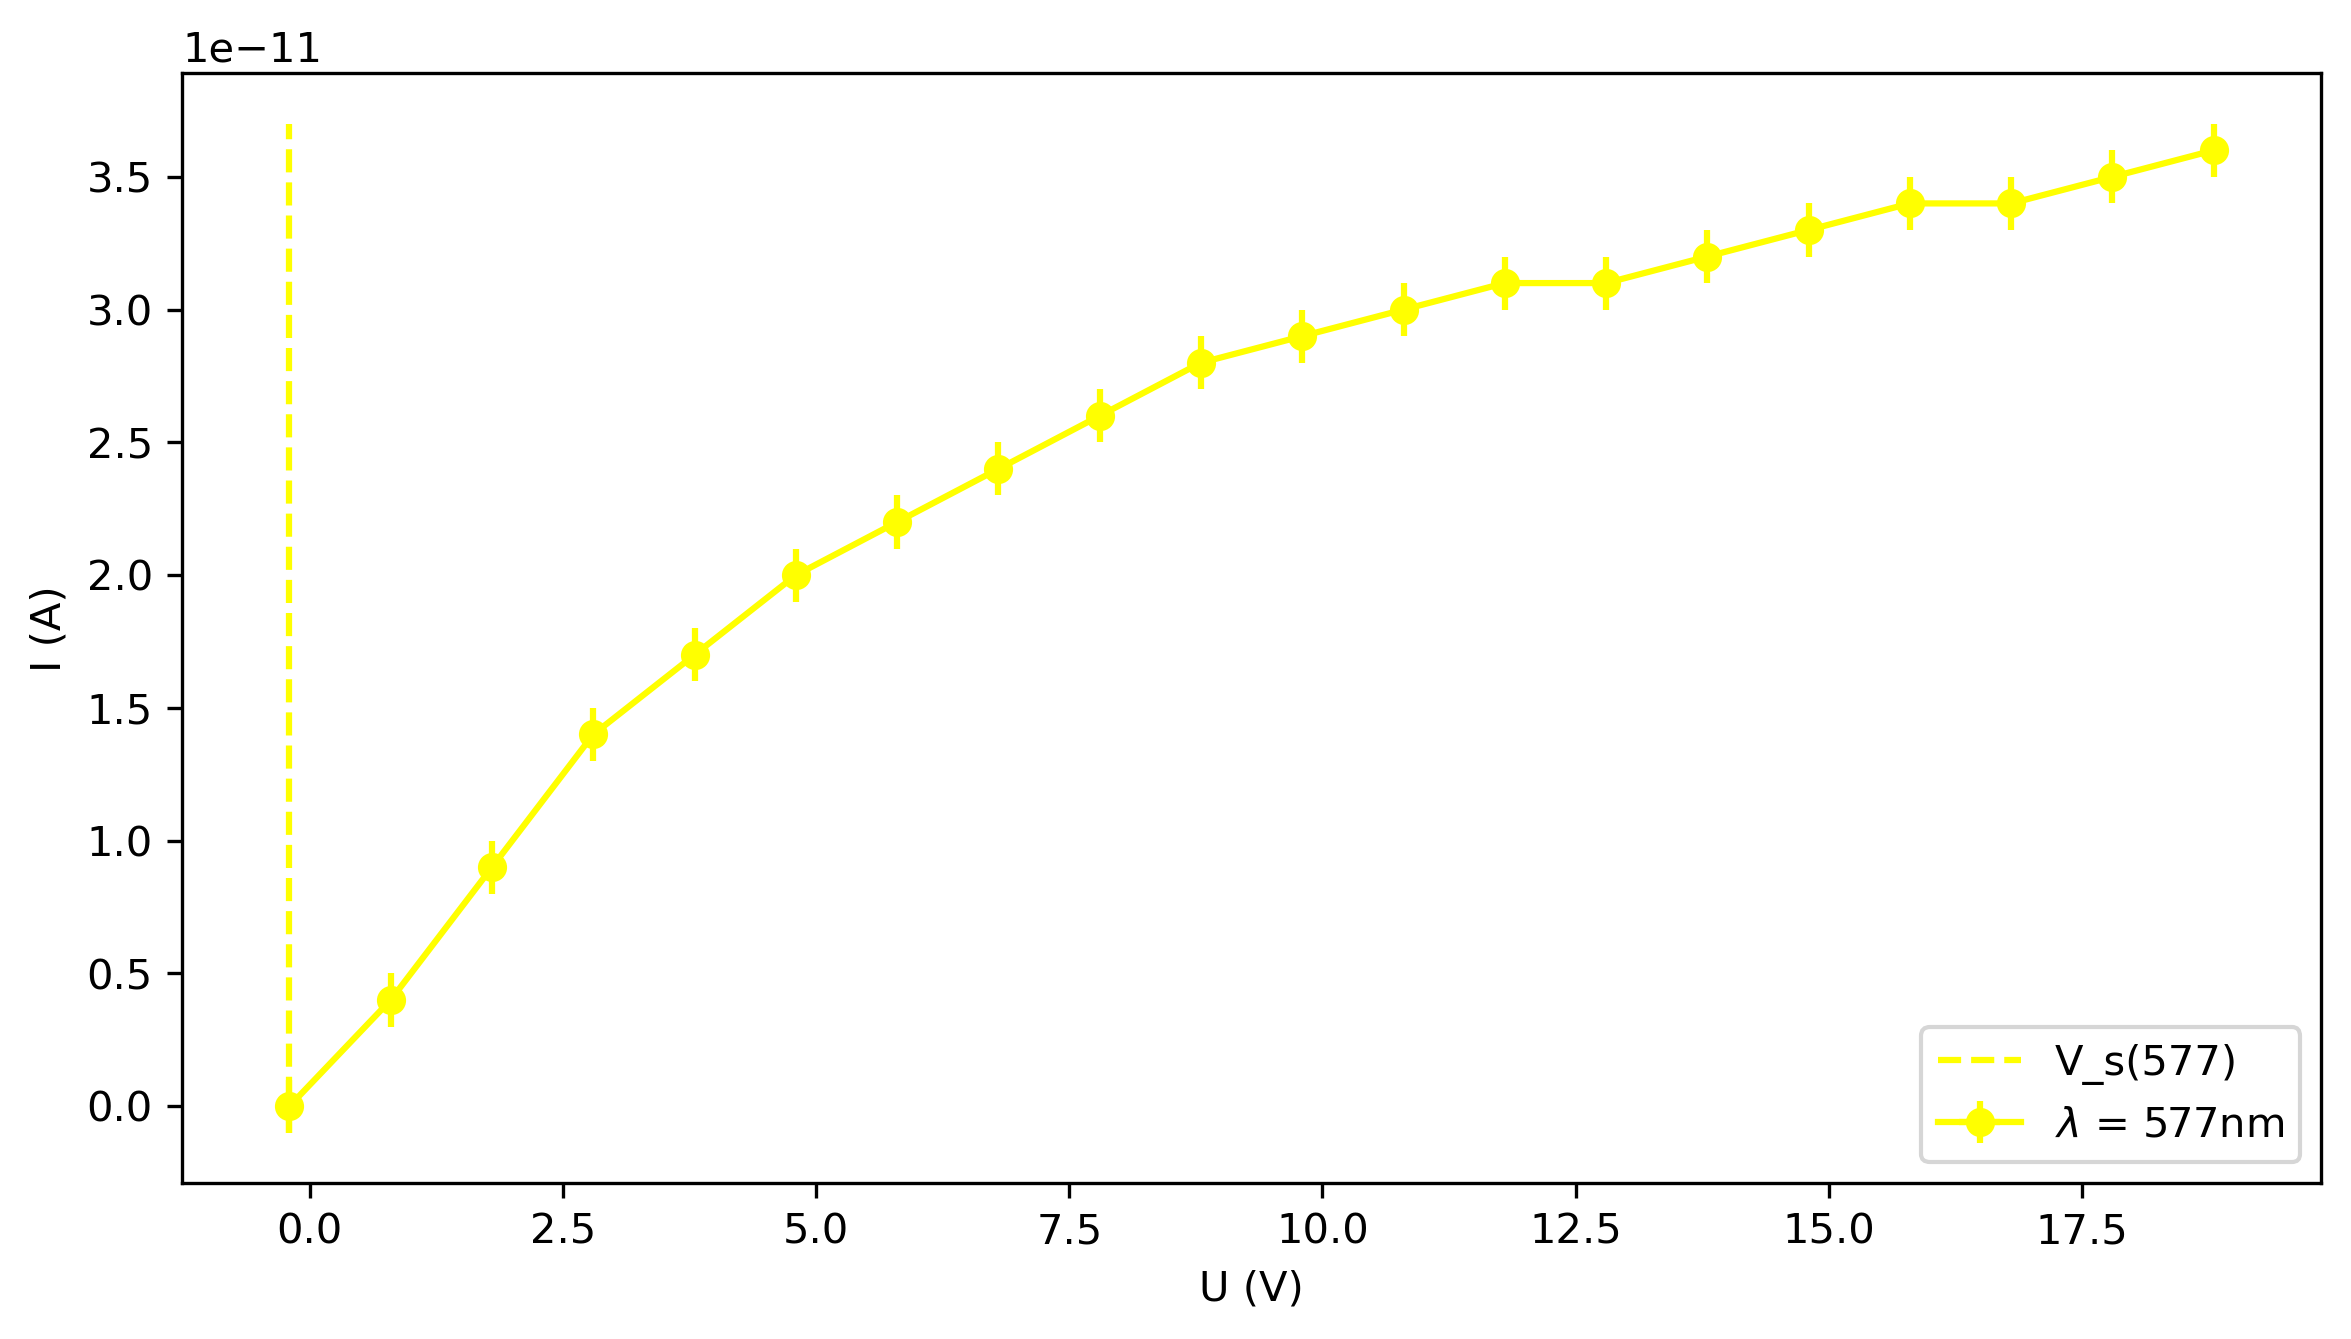

In [37]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
#plt.errorbar(v_436,i_436,sigma_I,sigma_V, 'o-', color = 'blue', label = r'$\lambda$ = 436nm')
#plt.errorbar(v_546,i_546,sigma_I,sigma_V, 'o-', color = 'greenyellow', label = r'$\lambda$ = 546nm')
plt.errorbar(v_577,i_577,sigma_I,sigma_V, 'o-', color = 'yellow', label = r'$\lambda$ = 577nm')
plt.plot([-0.2,-0.2],[-0.1e-11,3.7e-11], ls = '--', color =  'yellow', label = r'V_s(577)')

plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
plt.legend()
plt.show()

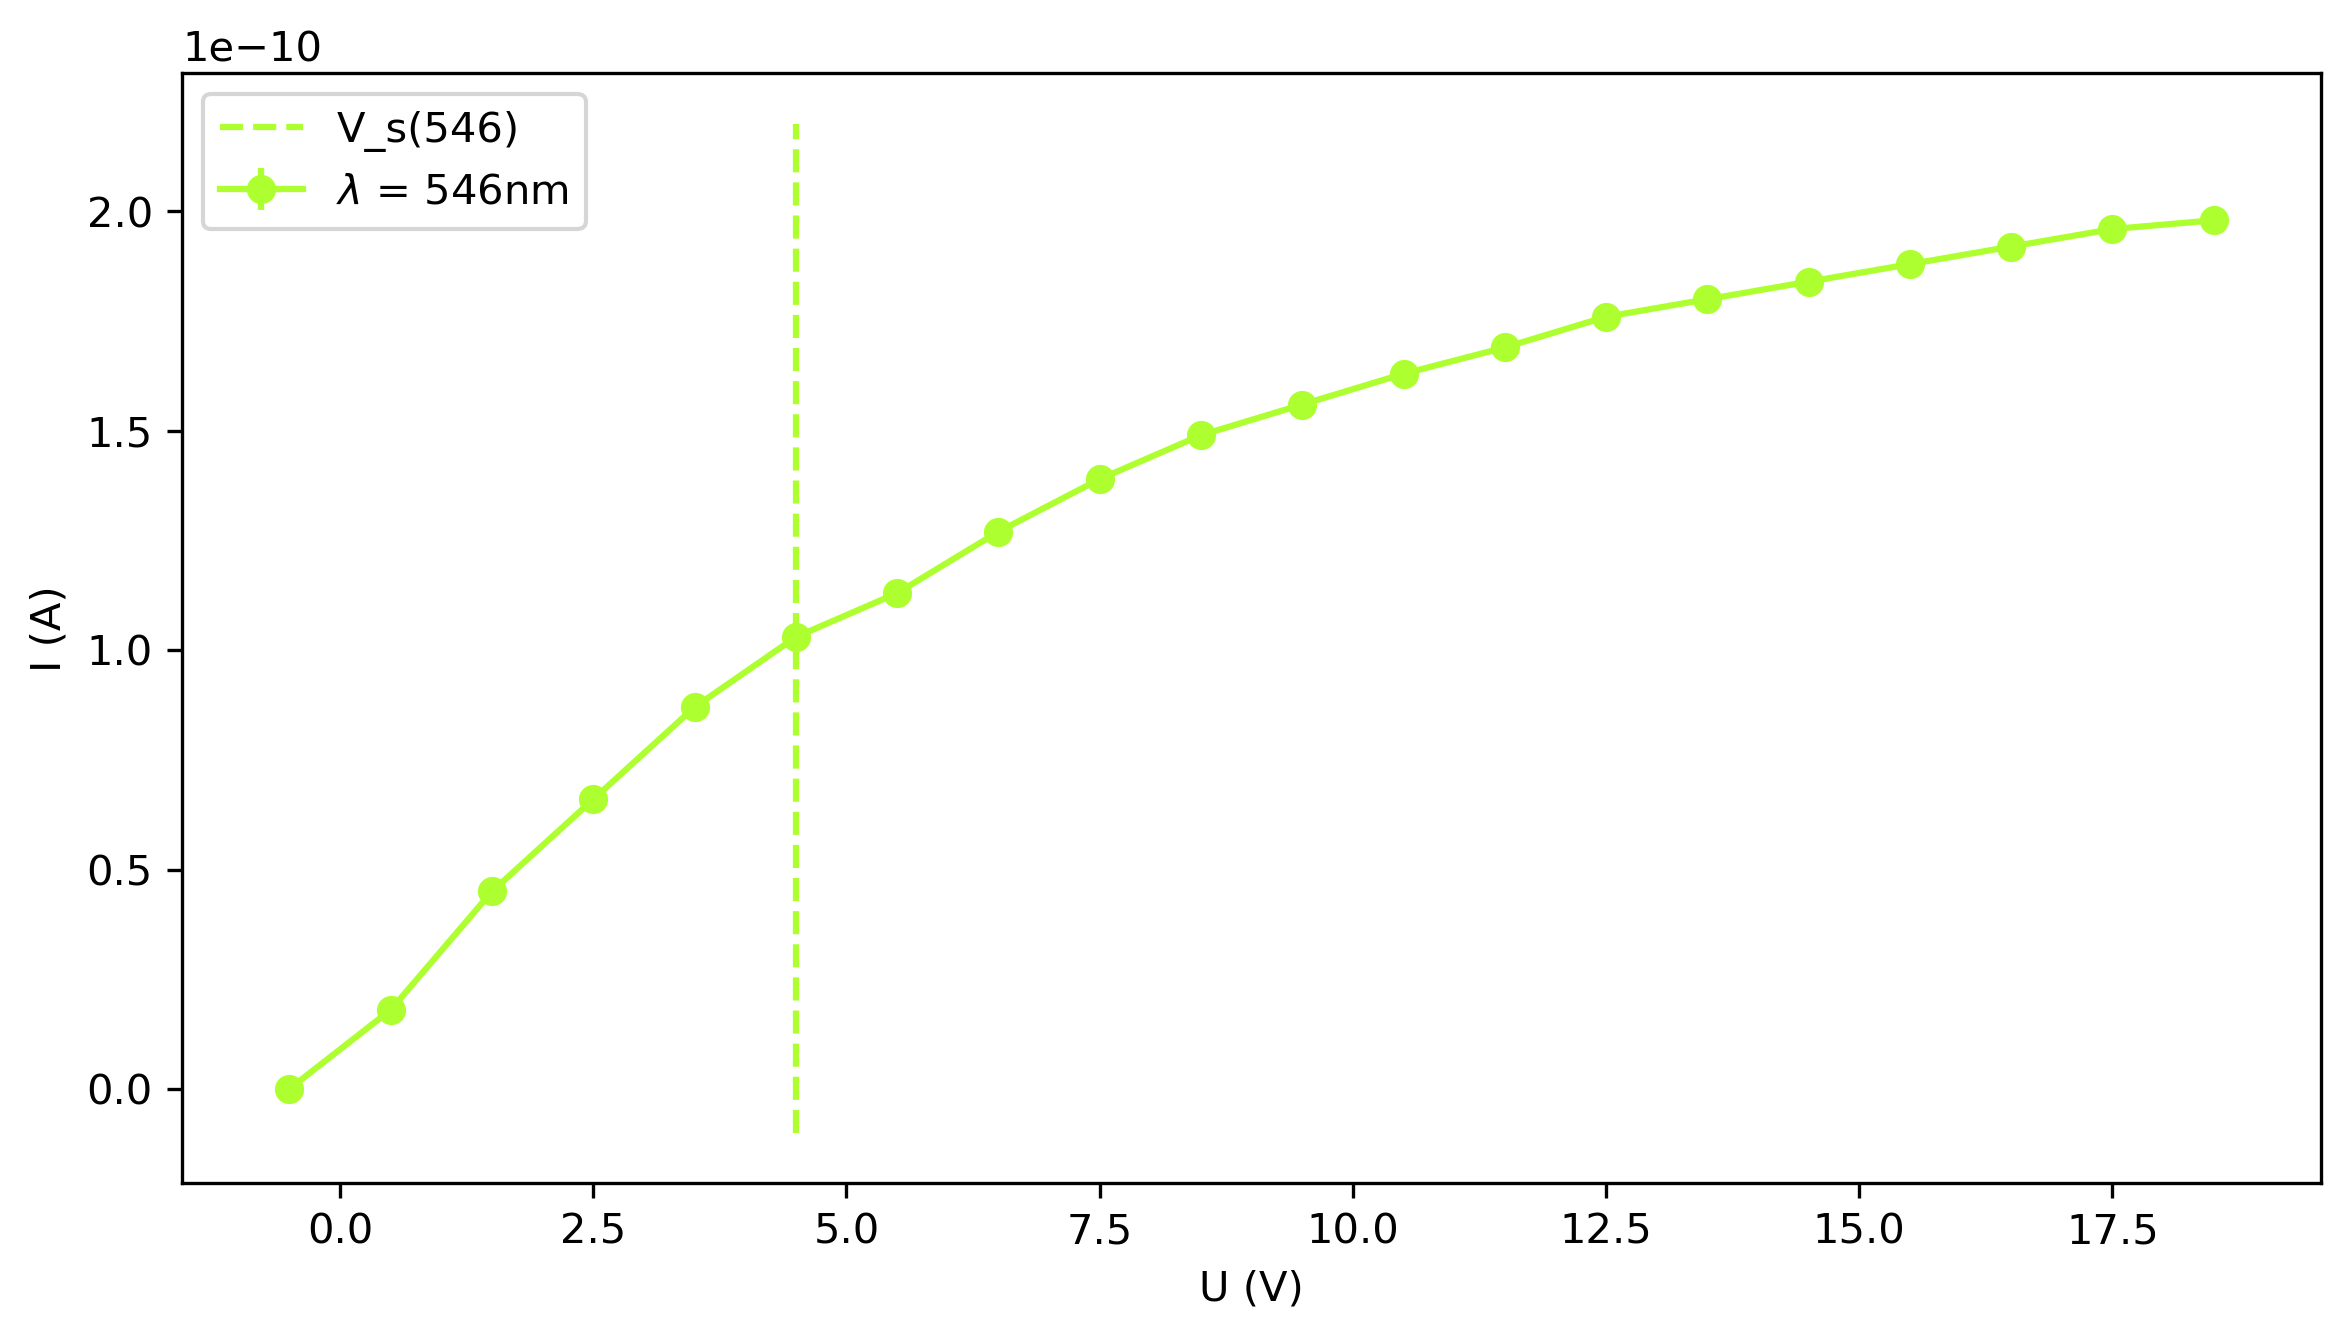

In [38]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
#plt.errorbar(v_436,i_436,sigma_I,sigma_V, 'o-', color = 'blue', label = r'$\lambda$ = 436nm')
plt.errorbar(v_546,i_546,sigma_I,sigma_V, 'o-', color = 'greenyellow', label = r'$\lambda$ = 546nm')
#plt.errorbar(v_577,i_577,sigma_I,sigma_V, 'o-', color = 'yellow', label = r'$\lambda$ = 577nm')
plt.plot([4.5,4.5],[-0.1e-10,2.2e-10], ls = '--', color =  'greenyellow', label = r'V_s(546)')

plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
plt.legend()
plt.show()

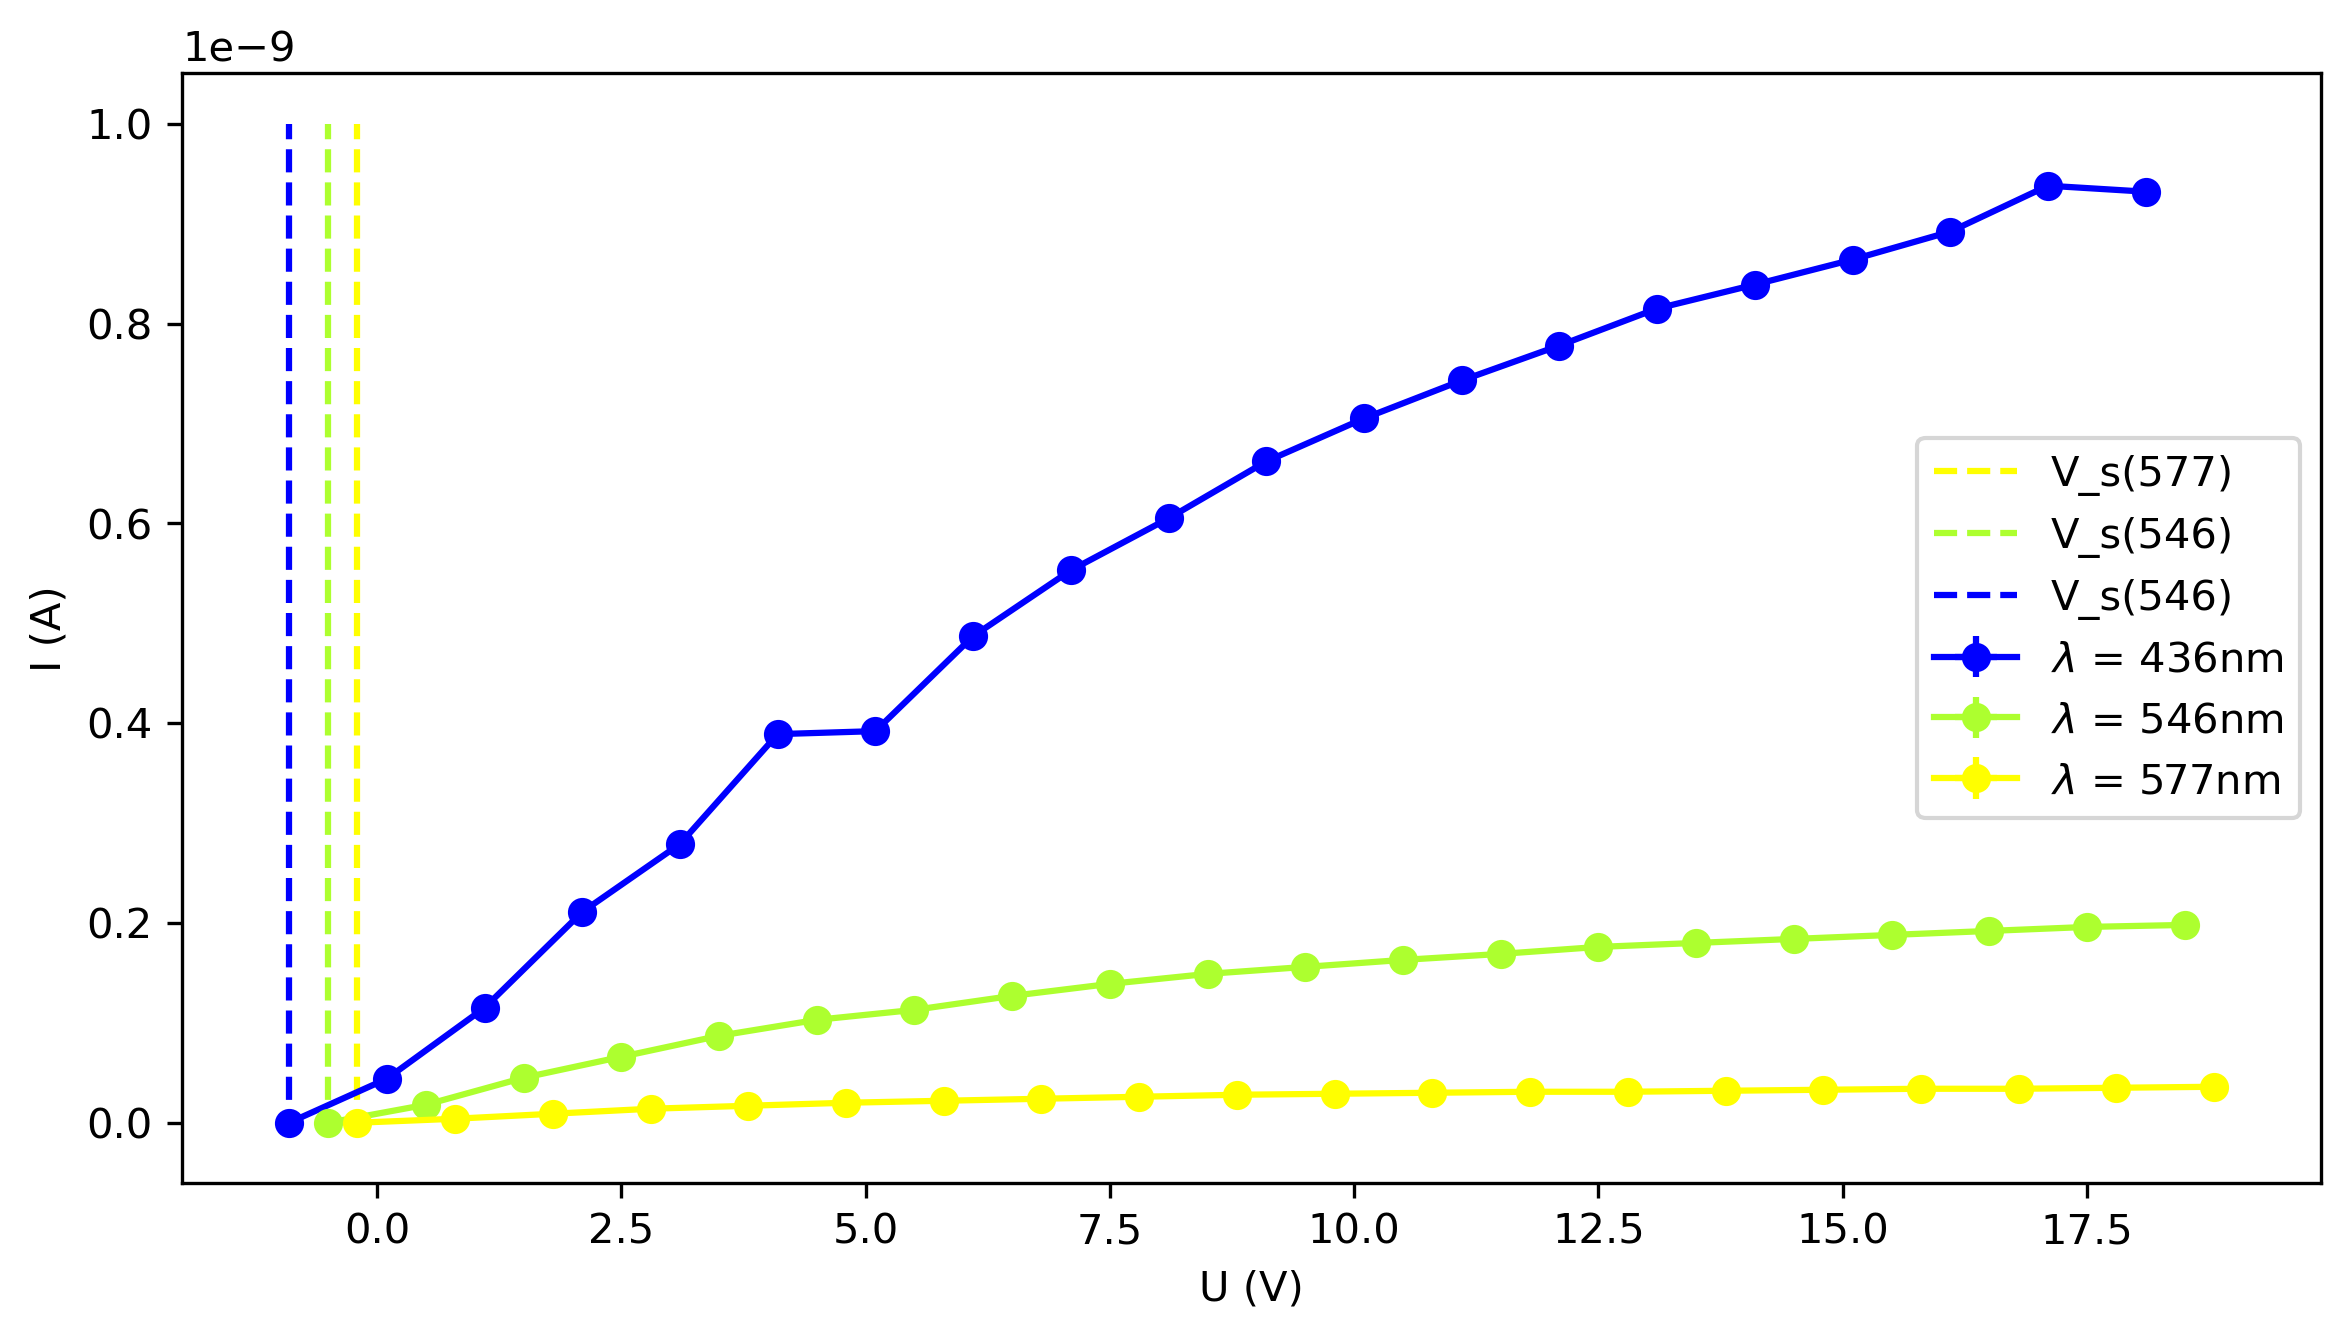

In [39]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(v_436,i_436,sigma_I,sigma_V, 'o-', color = 'blue', label = r'$\lambda$ = 436nm')
plt.errorbar(v_546,i_546,sigma_I,sigma_V, 'o-', color = 'greenyellow', label = r'$\lambda$ = 546nm')
plt.errorbar(v_577,i_577,sigma_I,sigma_V, 'o-', color = 'yellow', label = r'$\lambda$ = 577nm')
plt.plot([-0.2,-0.2],[-0.1e-10,10e-10], ls = '--', color =  'yellow', label = r'V_s(577)')
plt.plot([-0.5,-0.5],[-0.1e-10,10e-10], ls = '--', color =  'greenyellow', label = r'V_s(546)')
plt.plot([-0.9,-0.9],[-0.1e-10,10e-10], ls = '--', color =  'blue', label = r'V_s(546)')


plt.ylabel(r'I (A)')
plt.xlabel(r'U (V)')
plt.legend()
plt.show()